<a href="https://colab.research.google.com/github/sampica/CoderHouse_2023/blob/main/Entrega_Final_Sampietro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introducción**

Se propone hacer una evaluación de los daños sufridos por las edificaciones como resultado del terremoto de mangnitud 7.8 en la escala de richter acaecido en el distrito de Gorkha, Gandaki, Nepal. Como producto de dicho cataclismo, fallecieron 9000 personas, millones quedaron sin hogar y se estimó una pérdida de 10 billones de dólares en daños.
El dataset es de libre uso, proveniente de un portal específico del gobierno de Nepal, y contiene principalmente información concerniente a la estructura de las edificacionesy nivel de daño sufrido. Existen además, otros datasets vinculados que poseen estadisticas socoeconómicas y demográficas de  los propietaros legales de los edificios (no usado en esta instancia de evaluación).
La evaluación de este dataset tiene por objetivo predecir (y por lo tanto prevenir) futuros daños edilicios. Está orientado al público en general, pudiendo ser utilizdo además a modo orientativo  para hacer evaluaciones de riesgo sísmico por parte de organismos gubernamentales.

#**Hipótesis**

Como hipotesis principal, se plantea que debería existir una correlación entre los daños sufridos por las edificaciones y las características de las mismas (pudiendo enumerarse: material fundacional,altura, número de pisos, antigüedad de la edificación, pendiente del terreno sobre la que estuviera montada la consrucción, material del techo, material del piso).
Dado que fallecieron 9000 personas y millones quedaron sin hogar, es de esperar que la gran mayoría de las construcciones hayan sufrido daño severo (grados 5 y 4).
Puntualmente, se espera que, de haber una notoria proporción de daños severos, que sean pocos los edificios construidos con cemento reforzado o materiales similares.
A su vez, es de esperar que proporcionalmente hayan ocurrido mayores daños en aquellos edificaciones asentadas sobre superficies con pendientes naturales más pronunciadas.



In [ ]:
f

In [ ]:
import matplotlib.ticker as mtick

In [ ]:
from google.colab import drive

In [ ]:
drive.mount ("Entrega_Final_DS")

Mounted at Entrega_Final_DS


In [ ]:
%cd /content/Entrega_Final_DS/MyDrive/Entrega_Final_DS

/content/Entrega_Final_DS/MyDrive/Entrega_Final_DS


In [ ]:
%ls

 csv_building_structure.csv     'Terremoto de Nepal (Abril-2015)_Final.pptx'
 Entrega_Final_Sampietro.ipynb


#**Data Wrangling**

In [ ]:
#Generando el DF de estructura edilicia
df_estructura = pd.read_csv('csv_building_structure.csv', index_col = 'building_id')

In [ ]:
#Mostrando el cabezal del dataset
df_estructura.head()


,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
building_id,,,,,,,,,,,,,,,,,,,,,
120101000011,12,1207,120703,1,1,9,288,9,9,Flat,...,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
120101000021,12,1207,120703,1,1,15,364,9,9,Flat,...,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
120101000031,12,1207,120703,1,1,20,384,9,9,Flat,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
120101000041,12,1207,120703,1,1,20,312,9,9,Flat,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
120101000051,12,1207,120703,1,1,30,308,9,9,Flat,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


In [ ]:
df_estructura.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762106 entries, 120101000011 to 366709001281
Data columns (total 30 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   district_id                             762106 non-null  int64 
 1   vdcmun_id                               762106 non-null  int64 
 2   ward_id                                 762106 non-null  int64 
 3   count_floors_pre_eq                     762106 non-null  int64 
 4   count_floors_post_eq                    762106 non-null  int64 
 5   age_building                            762106 non-null  int64 
 6   plinth_area_sq_ft                       762106 non-null  int64 
 7   height_ft_pre_eq                        762106 non-null  int64 
 8   height_ft_post_eq                       762106 non-null  int64 
 9   land_surface_condition                  762106 non-null  object
 10  foundation_type                        

In [ ]:
#convirtiendo los valores de ID a objeto para evitar cálculos estadísticos con los mismos
df_estructura= df_estructura.astype({'district_id': 'object', 'vdcmun_id': 'object', 'ward_id': 'object'})
df_estructura.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762106 entries, 120101000011 to 366709001281
Data columns (total 30 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   district_id                             762106 non-null  object
 1   vdcmun_id                               762106 non-null  object
 2   ward_id                                 762106 non-null  object
 3   count_floors_pre_eq                     762106 non-null  int64 
 4   count_floors_post_eq                    762106 non-null  int64 
 5   age_building                            762106 non-null  int64 
 6   plinth_area_sq_ft                       762106 non-null  int64 
 7   height_ft_pre_eq                        762106 non-null  int64 
 8   height_ft_post_eq                       762106 non-null  int64 
 9   land_surface_condition                  762106 non-null  object
 10  foundation_type                        

Rapidamente se observa un mayor conteo de valores nulos en las dos últimas columnas, pero se buscarán los nulos de manera puntual para verificar

In [ ]:
# contar el numero de registros vacíos por columnas
nun_missing_struct = df_estructura.isnull().sum().reset_index()
print(nun_missing_struct)

                                     index   0
0                              district_id   0
1                                vdcmun_id   0
2                                  ward_id   0
3                      count_floors_pre_eq   0
4                     count_floors_post_eq   0
5                             age_building   0
6                        plinth_area_sq_ft   0
7                         height_ft_pre_eq   0
8                        height_ft_post_eq   0
9                   land_surface_condition   0
10                         foundation_type   0
11                               roof_type   0
12                       ground_floor_type   0
13                        other_floor_type   0
14                                position   1
15                      plan_configuration   1
16            has_superstructure_adobe_mud   0
17     has_superstructure_mud_mortar_stone   0
18           has_superstructure_stone_flag   0
19  has_superstructure_cement_mortar_stone   0
20     has_su

Dado que existen 762106 entradas en total, y solo doce filas con valores nulos en 4 columnas, se procede a eliminar dichos registros con valores nulos.

In [ ]:
df_estructura.dropna(inplace = True)

In [ ]:
nun_missing_struct = df_estructura.isnull().sum().reset_index()
print(nun_missing_struct)

                                     index  0
0                              district_id  0
1                                vdcmun_id  0
2                                  ward_id  0
3                      count_floors_pre_eq  0
4                     count_floors_post_eq  0
5                             age_building  0
6                        plinth_area_sq_ft  0
7                         height_ft_pre_eq  0
8                        height_ft_post_eq  0
9                   land_surface_condition  0
10                         foundation_type  0
11                               roof_type  0
12                       ground_floor_type  0
13                        other_floor_type  0
14                                position  0
15                      plan_configuration  0
16            has_superstructure_adobe_mud  0
17     has_superstructure_mud_mortar_stone  0
18           has_superstructure_stone_flag  0
19  has_superstructure_cement_mortar_stone  0
20     has_superstructure_mud_mort

Se verifica que ya no existen valores nulos

In [ ]:
#Obteniendo los estadísticos básicos y redondeando
df_estructura.describe().round(1)

,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
count,762094.0,762094.0,762094.0,762094.0,762094.0,762094.0,762094.0,762094.0,762094.0,762094.0,762094.0,762094.0,762094.0,762094.0,762094.0,762094.0,762094.0
mean,2.1,1.3,24.3,406.7,16.0,9.9,0.0,0.8,0.0,0.0,0.0,0.1,0.3,0.1,0.0,0.0,0.0
std,0.7,1.1,65.0,226.8,5.5,8.6,0.2,0.4,0.2,0.1,0.1,0.3,0.4,0.3,0.2,0.1,0.1
min,1.0,0.0,0.0,70.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.0,0.0,9.0,280.0,12.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2.0,1.0,16.0,358.0,16.0,11.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,2.0,2.0,27.0,470.0,18.0,16.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
max,9.0,9.0,999.0,5000.0,99.0,99.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
#Buscando outliers
def find_outliers_IQR(df_estructura):
    q1=df_estructura.quantile(0.25)
    q3=df_estructura.quantile(0.75)
    IQR=q3-q1
    outliers = df_estructura[((df_estructura<(q1-1.5*IQR)) | (df_estructura>(q3+1.5*IQR)))]
    return outliers

In [ ]:
# Buscando porcentaje de outliers. Recurso válido ara las columnas 3 a 8 que contienen datos númericos no booleanos, es decir,que no son del tipo 1(verdadero y 0(falso)
index = find_outliers_IQR(df_estructura["plinth_area_sq_ft"]).index
print(f"percentage of outliers = {round(len(index)/df_estructura.shape[0],2)}")

percentage of outliers = 0.06


In [ ]:
#Solo un 6% de los datos son outliers, se procede a eliminarlos
df_estructura=df_estructura.drop(index,axis=0)

In [ ]:
#Obteniendo los estadísticos básicos y redondeando
df_estructura.describe().round(1)

,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
count,717369.0,717369.0,717369.0,717369.0,717369.0,717369.0,717369.0,717369.0,717369.0,717369.0,717369.0,717369.0,717369.0,717369.0,717369.0,717369.0,717369.0
mean,2.1,1.2,24.5,366.7,15.9,9.6,0.0,0.8,0.0,0.0,0.0,0.1,0.3,0.1,0.0,0.0,0.0
std,0.6,1.0,64.7,134.4,5.2,8.3,0.2,0.4,0.2,0.1,0.1,0.2,0.4,0.3,0.2,0.1,0.1
min,1.0,0.0,0.0,70.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.0,0.0,9.0,270.0,12.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2.0,1.0,16.0,350.0,16.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,2.0,2.0,27.0,450.0,18.0,16.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
max,9.0,9.0,999.0,755.0,99.0,99.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0



#**EDA**

**Primer insight de correlaciones entre variables usando un heatmap de correlación de seaborn**

<ipython-input-18-6f2b9240ebb4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df_estructura.corr(), cmap="crest", annot=True, linewidth=.5, fmt='.2f')


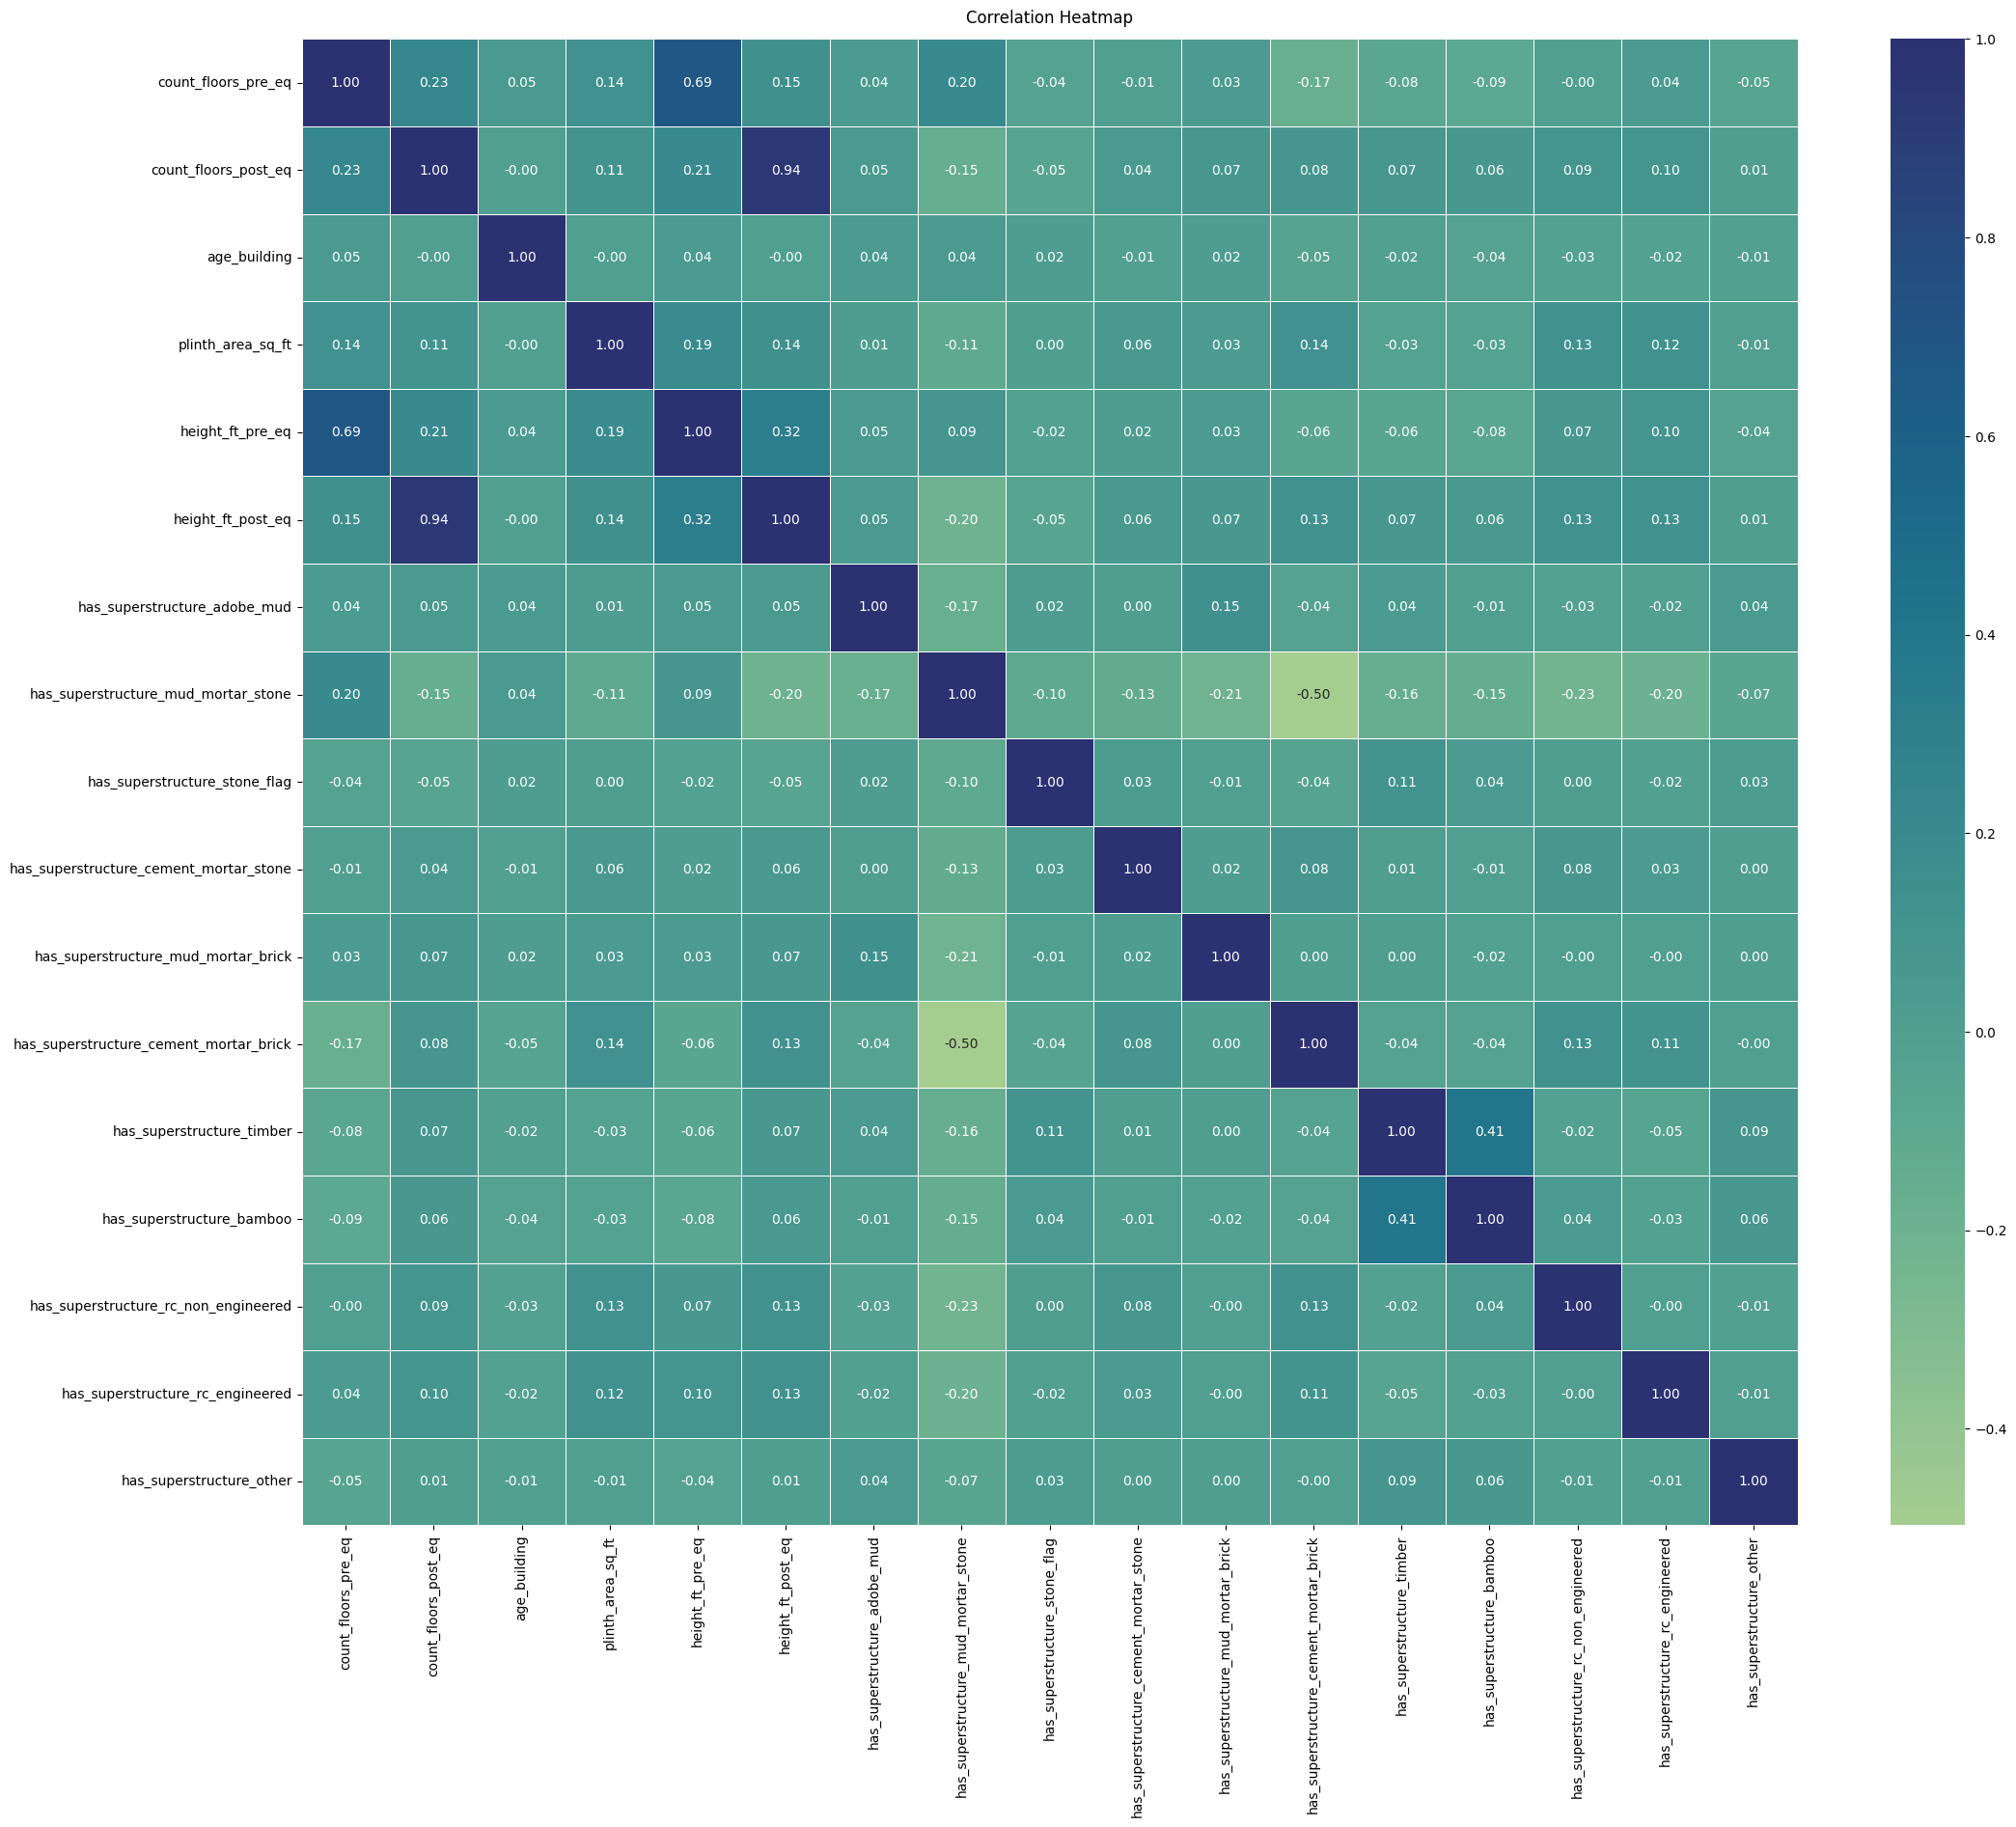

In [ ]:
plt.figure(figsize=(25, 20))

heatmap = sns.heatmap(df_estructura.corr(), cmap="crest", annot=True, linewidth=.5, fmt='.2f')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Del análisis del heatmap no se observan relaciones fuertes (de un coeficiente de relación mayor al 0.5), salvo la que era de esperar, del conteo de pisos pre y post terremoto con respecto a la altura de las edificaciones (relación lineal clara de proporcionalidad directa que indica que a mayor numero de pisos, mayor sera la altura del edificio).
Si se puede observar del heatmap, que las edificaciones con cemento reforzado como material fundacional, son los que mayor area de platea en pies cuadrados tienen y que fueron las que mayor cantidad de pisos en pie conservaron luego del terremoto.
También se pueden observar que materiales fueron empleados de manera conjunta en la construcción, siendo la asociación más notoria la que se establece entre el bambú y la madera.

Dado que fallecieron 9000 personas y millones se quedaron sin hogar, al hacer un análisis univariado del grado de daño sufrido por las edificaciones, es de esperar que la gran mayoría haya sufrido un daño severo (grados 5 y 4)

Text(0, 0.5, 'Frecuencia absoluta')

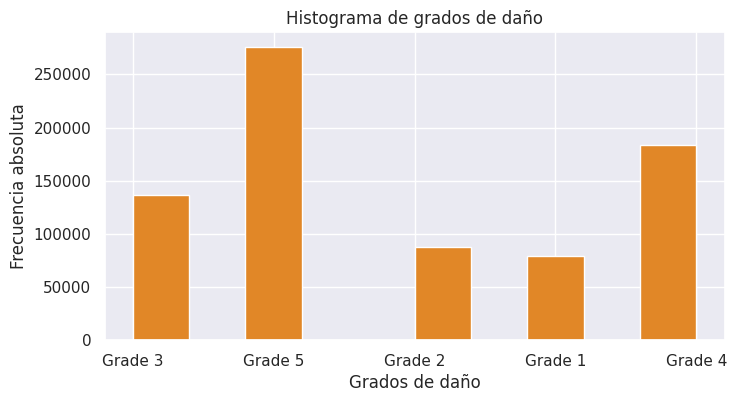

In [ ]:
#Analizando la ocurrencia de grados de daño en un histograma de frecuencias absolutas (ánalisis univariado)
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(df_estructura['damage_grade'], bins=10, color= '#E18727')
ax.set_title('Histograma de grados de daño')
ax.set_xlabel('Grados de daño')
ax.set_ylabel('Frecuencia absoluta')

Como era de esperarse, se observa que la mayor parte de los edificios sufrieron un grado severo de daño (5). A continuación, se intentará establecer si existe una relación entre el grado de daño y las diferentes variables en la construcción edilicia de las que se tiene dato.
Se plantea como hipotesis que, debido a la gran proporción de daños severos sufridos por las edificaciones, haya poca proporción de edificaciones cemento reforzado o materiales similares.

## Análisis del daño de acuerdo al material fundacional

Se plantea como hipotesis que, debido a la gran proporción de daños severos sufridos por las edificaciones, haya poca proporción de edificaciones cemento reforzado o materiales similares.

In [ ]:
#Analizando el número de edificios de acuerdo a su material fundacional
ax.hist(df_estructura['foundation_type'], bins=10)
ax.set_title('Número de edificios por material fundacional')
ax.set_xlabel('Tipo de material')
ax.set_ylabel('Frecuencia absoluta')

Text(28.0, 0.5, 'Frecuencia absoluta')

Se observa que la mayoría de los edificios estaban hechos de una mezcla de fango con cemento y piedras/ladrillos

La información referida al material fundacional está en una sola columna (foundation type) pero también se encuentra desagragregada en una mayor cantidad de categorias en datos de tipo binario siendo 1= lo tiene y 0= no lo tiene

In [ ]:
#Analizando el grado de daño sufrido por las edificaciones en base al material fundacional de las mismas (utilizando los datos binarios)
df_daño_material = df_estructura.groupby(["damage_grade"]).sum().reset_index()[["damage_grade","has_superstructure_adobe_mud","has_superstructure_mud_mortar_stone", "has_superstructure_stone_flag","has_superstructure_cement_mortar_stone","has_superstructure_mud_mortar_brick","has_superstructure_cement_mortar_brick","has_superstructure_timber","has_superstructure_bamboo","has_superstructure_rc_non_engineered","has_superstructure_rc_engineered","has_superstructure_other"]]
df_daño_material

<ipython-input-18-421a16bda550>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_daño_material = df_estructura.groupby(["damage_grade"]).sum().reset_index()[["damage_grade","has_superstructure_adobe_mud","has_superstructure_mud_mortar_stone", "has_superstructure_stone_flag","has_superstructure_cement_mortar_stone","has_superstructure_mud_mortar_brick","has_superstructure_cement_mortar_brick","has_superstructure_timber","has_superstructure_bamboo","has_superstructure_rc_non_engineered","has_superstructure_rc_engineered","has_superstructure_other"]]


,damage_grade,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
0,Grade 1,1490,22594,553,2398,1271,23840,26748,9849,11876,8500,2229
1,Grade 2,3562,52098,2633,2392,2706,16476,27875,10977,7875,2822,1092
2,Grade 3,8053,109159,3854,2768,4974,8995,40430,13897,4611,903,1867
3,Grade 4,9852,165715,6060,2496,5434,3282,46063,13826,2389,152,1988
4,Grade 5,9357,260314,13666,1999,3114,1917,56091,12787,3576,111,1989


Dado el aspecto binario de los datos, siendo 1= lo tiene y 0= no lo tiene, al hacer la suma, una mayor valor indica posesión de dicho material.

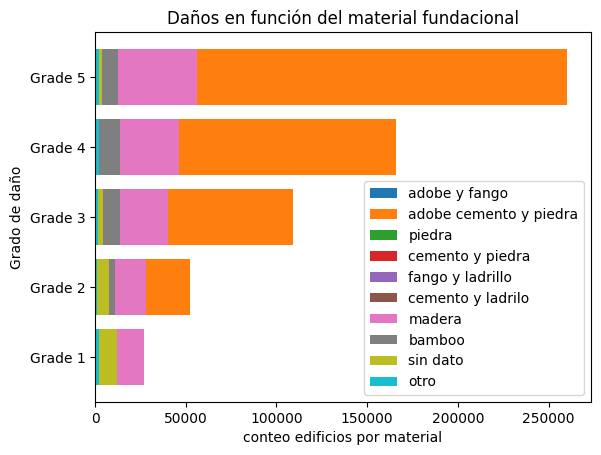

In [ ]:
fig, ax = plt.subplots()
ax.barh( df_daño_material['damage_grade'],df_daño_material['has_superstructure_adobe_mud'], label ='adobe y fango')
ax.barh(df_daño_material['damage_grade'], df_daño_material['has_superstructure_mud_mortar_stone'], label ='adobe cemento y piedra')
ax.barh(df_daño_material['damage_grade'],df_daño_material['has_superstructure_stone_flag'], label ='piedra')
ax.barh(df_daño_material['damage_grade'], df_daño_material['has_superstructure_cement_mortar_stone'], label ='cemento y piedra')
ax.barh(df_daño_material['damage_grade'], df_daño_material['has_superstructure_mud_mortar_brick'], label ='fango y ladrillo')
ax.barh(df_daño_material['damage_grade'], df_daño_material['has_superstructure_cement_mortar_brick'], label ='cemento y ladrilo')
ax.barh(df_daño_material['damage_grade'], df_daño_material['has_superstructure_timber'], label ='madera')
ax.barh(df_daño_material['damage_grade'],df_daño_material['has_superstructure_bamboo'], label ='bamboo')
ax.barh(df_daño_material['damage_grade'], df_daño_material['has_superstructure_rc_non_engineered'], label ='sin dato')
ax.barh(df_daño_material['damage_grade'],df_daño_material['has_superstructure_other'], label ='otro')

ax.set_xlabel("conteo edificios por material")
ax.set_ylabel('Grado de daño')
ax.set_title('Daños en función del material fundacional')
ax.legend()

Se observa que los edificios que mayor daño sufrieron, son los construidos con adobe y piedra y con madera

Los datos asociados al material fundacional también están agrupados en una única columna. Se hará un EDA con estos datos para ver si hay diferencias significativas en los resultados

In [ ]:
#Analizando el grado de daño sufrido por las edificaciones en base al material fundacional de las mismas, segundo método
df_daño_material2 = df_estructura.groupby(['foundation_type','damage_grade']).size().reset_index(name='count')
df_daño_material2

,foundation_type,damage_grade,count
0,Bamboo/Timber,Grade 1,17201
1,Bamboo/Timber,Grade 2,13357
2,Bamboo/Timber,Grade 3,13244
3,Bamboo/Timber,Grade 4,8368
4,Bamboo/Timber,Grade 5,5302
5,Cement-Stone/Brick,Grade 1,11642
6,Cement-Stone/Brick,Grade 2,8847
7,Cement-Stone/Brick,Grade 3,7104
8,Cement-Stone/Brick,Grade 4,5621
9,Cement-Stone/Brick,Grade 5,6031


In [ ]:
df_daño_material2= df_daño_material2.set_index(['foundation_type', 'damage_grade'])

In [ ]:
df_daño_material2

count
foundation_type        damage_grade        
Bamboo/Timber          Grade 1        17201
                       Grade 2        13357
                       Grade 3        13244
                       Grade 4         8368
                       Grade 5         5302
Cement-Stone/Brick     Grade 1        11642
                       Grade 2         8847
                       Grade 3         7104
                       Grade 4         5621
                       Grade 5         6031
Mud mortar-Stone/Brick Grade 1        29484
                       Grade 2        56044
                       Grade 3       112442
                       Grade 4       168458
                       Grade 5       262277
Other                  Grade 1         1364
                       Grade 2          405
                       Grade 3          459
                       Grade 4          691
                       Grade 5         1633
RC                     Grade 1        19124
                       Grade 2         8604
                       Grade 3         3163
                       Grade 4          706
                       Grade 5          523

In [ ]:
#calculando la proporción del grado de daño
df_daño_material2 = df_daño_material2.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

<ipython-input-23-7e83af91007b>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_daño_material2 = df_daño_material2.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()


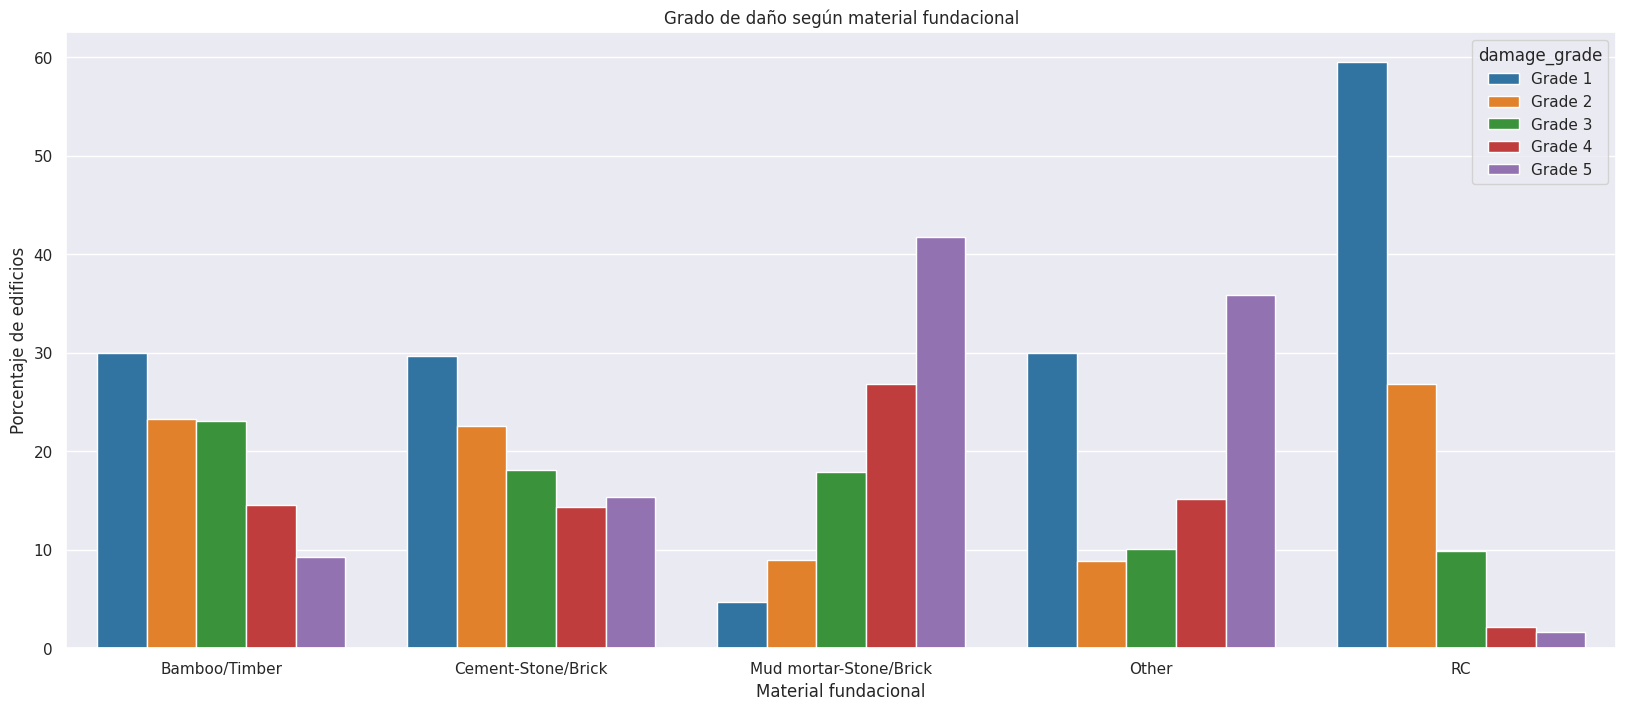

In [ ]:
#Graficando según segundo método

sns.barplot(data=df_daño_material2 , x='foundation_type', y= "count", hue = "damage_grade")
sns.set(rc = {'figure.figsize':(20,8)})
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
sns.set_palette ('tab10')
plt.title("Grado de daño según material fundacional")
plt.xlabel("Material fundacional")
plt.ylabel("Porcentaje de edificios")
plt.show()

Analisis similar, las edificaciones menos sismorresistentes fueron las hechas con una mezcla de fango piedra y cemento (como material cementante) pero se incluye al ladrillo.
En cambio, las edificaciones mas sismorresistentes fueron las que contaban con cemento reforzado.

##**Análisis de acuerdo al tipo de techo**

Text(0, 0.5, 'Frecuencia absoluta')

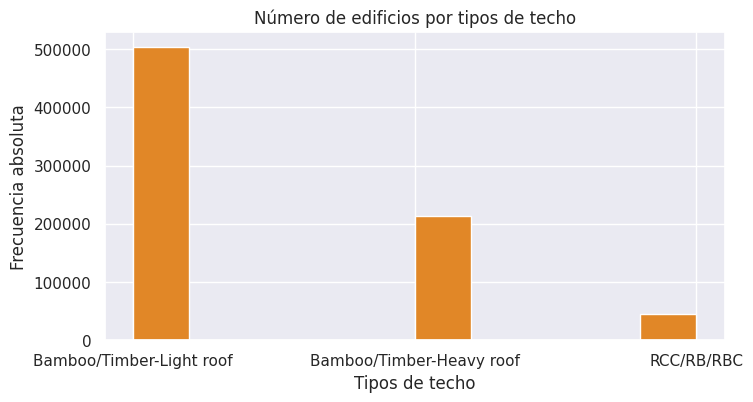

In [ ]:
#Analizando el número de edificios por tipo de techo
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(df_estructura['roof_type'], bins=10, color='#E18727')
ax.set_title('Número de edificios por tipos de techo')
ax.set_xlabel('Tipos de techo')
ax.set_ylabel('Frecuencia absoluta')

La mayor parte de las edificaciones poseían techos de bamboo y madera

In [ ]:
#Analizando el grado de daño sufrido por las edificaciones en base al tipo de techo
df_daño_techo = df_estructura.groupby(['roof_type','damage_grade']).size().reset_index(name='count')
df_daño_techo

,roof_type,damage_grade,count
0,Bamboo/Timber-Heavy roof,Grade 1,13498
1,Bamboo/Timber-Heavy roof,Grade 2,22394
2,Bamboo/Timber-Heavy roof,Grade 3,41267
3,Bamboo/Timber-Heavy roof,Grade 4,51757
4,Bamboo/Timber-Heavy roof,Grade 5,84858
5,Bamboo/Timber-Light roof,Grade 1,40989
6,Bamboo/Timber-Light roof,Grade 2,52552
7,Bamboo/Timber-Light roof,Grade 3,89821
8,Bamboo/Timber-Light roof,Grade 4,130513
9,Bamboo/Timber-Light roof,Grade 5,189861


In [ ]:
df_daño_techo= df_daño_techo.set_index(['roof_type', 'damage_grade'])
df_daño_techo

count
roof_type                damage_grade        
Bamboo/Timber-Heavy roof Grade 1        13498
                         Grade 2        22394
                         Grade 3        41267
                         Grade 4        51757
                         Grade 5        84858
Bamboo/Timber-Light roof Grade 1        40989
                         Grade 2        52552
                         Grade 3        89821
                         Grade 4       130513
                         Grade 5       189861
RCC/RB/RBC               Grade 1        24328
                         Grade 2        12311
                         Grade 3         5324
                         Grade 4         1574
                         Grade 5         1047

In [ ]:
#calculando la proporción del grado de daño
df_daño_techo = df_daño_techo.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

<ipython-input-43-4ec74218e380>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_daño_techo = df_daño_techo.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()


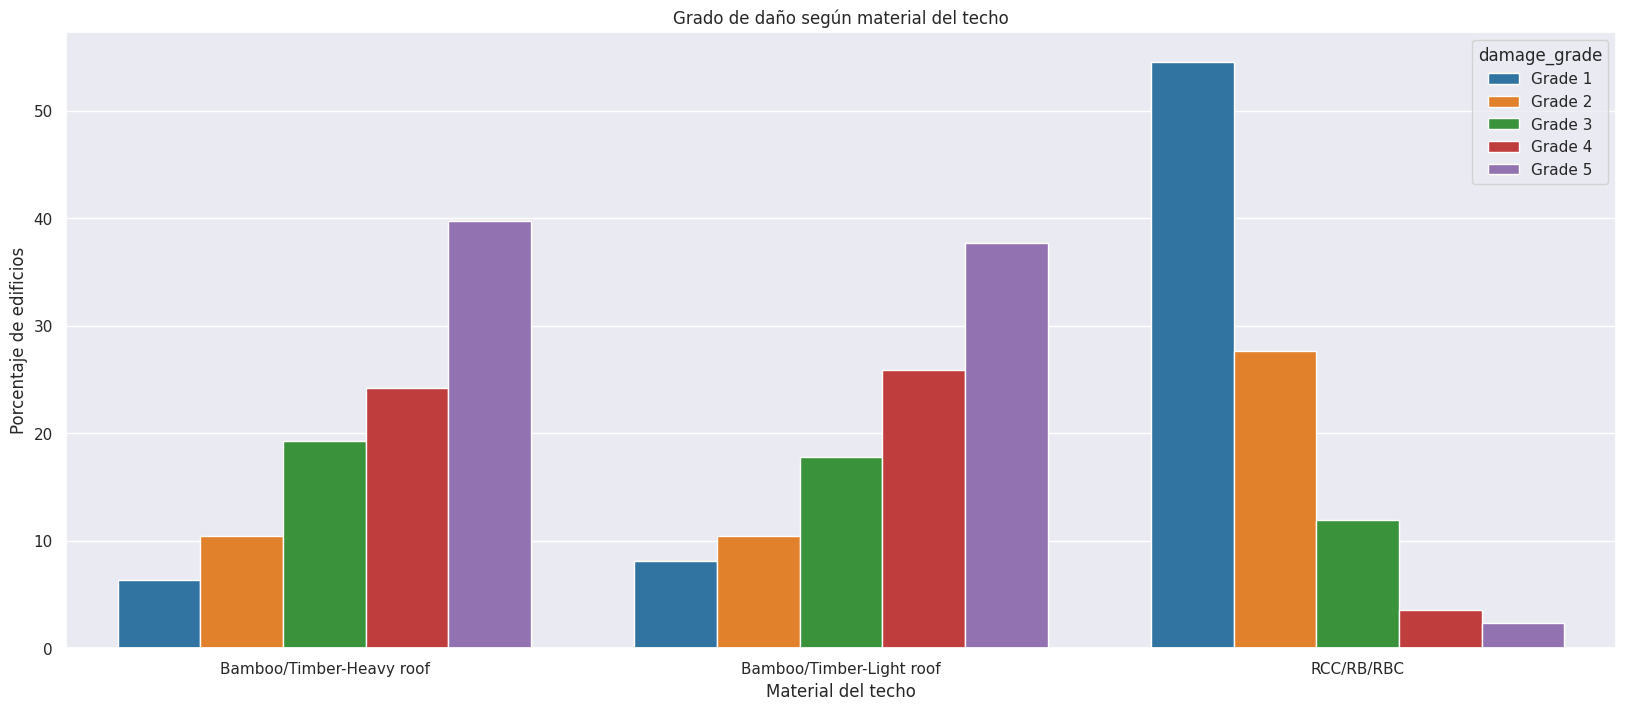

In [ ]:
sns.barplot(data= df_daño_techo , x='roof_type', y= "count", hue = "damage_grade")
sns.set(rc = {'figure.figsize':(20,8)})
sns.set_palette ('tab10')
plt.title("Grado de daño según material del techo")
plt.xlabel("Material del techo")
plt.ylabel("Porcentaje de edificios")
plt.show()

Se observan mayores daños en los edificios con techos de bamboo/madera independientemente de si eran del tipo liviano o ligero. Las edificaciones con techos de cemento reforzado y sus derivados fueron las mas sismoresistentes

##**Análisis según la pendiente del terreno**

En este caso, se plantea como hipótesis de que proporcionalmente hayan ocurrido daños mas severos en aquellos edificaciones asentadas sobre superficies con pendientes naturales más pronunciadas.

Text(0, 0.5, 'Frecuencia absoluta')

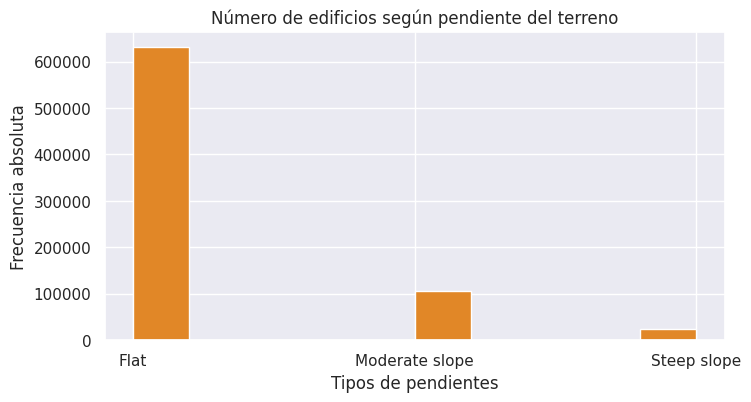

In [ ]:
#Analizando el número de edificios de acuerdo a la pendiente del terreno sobre el que estaban asentados
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(df_estructura['land_surface_condition'], bins=10,  color='#E18727')
ax.set_title('Número de edificios según pendiente del terreno')
ax.set_xlabel('Tipos de pendientes')
ax.set_ylabel('Frecuencia absoluta')

La mayor parte de las edificaciones estaban sobre superficies llanas

In [ ]:
#Analizando el grado de daño sufrido por las edificaciones según el terreno
df_daño_superficie = df_estructura.groupby(['land_surface_condition','damage_grade']).size().reset_index(name='count')
df_daño_superficie

,land_surface_condition,damage_grade,count
0,Flat,Grade 1,68849
1,Flat,Grade 2,73166
2,Flat,Grade 3,111244
3,Flat,Grade 4,148615
4,Flat,Grade 5,229789
5,Moderate slope,Grade 1,8063
6,Moderate slope,Grade 2,11813
7,Moderate slope,Grade 3,20624
8,Moderate slope,Grade 4,28694
9,Moderate slope,Grade 5,36446


In [ ]:
df_daño_superficie= df_daño_superficie.set_index(['land_surface_condition', 'damage_grade'])

In [ ]:
#calculando la proporción del grado de daño
df_daño_superficie = df_daño_superficie.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

<ipython-input-62-1a8d0cfe2846>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_daño_superficie = df_daño_superficie.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()


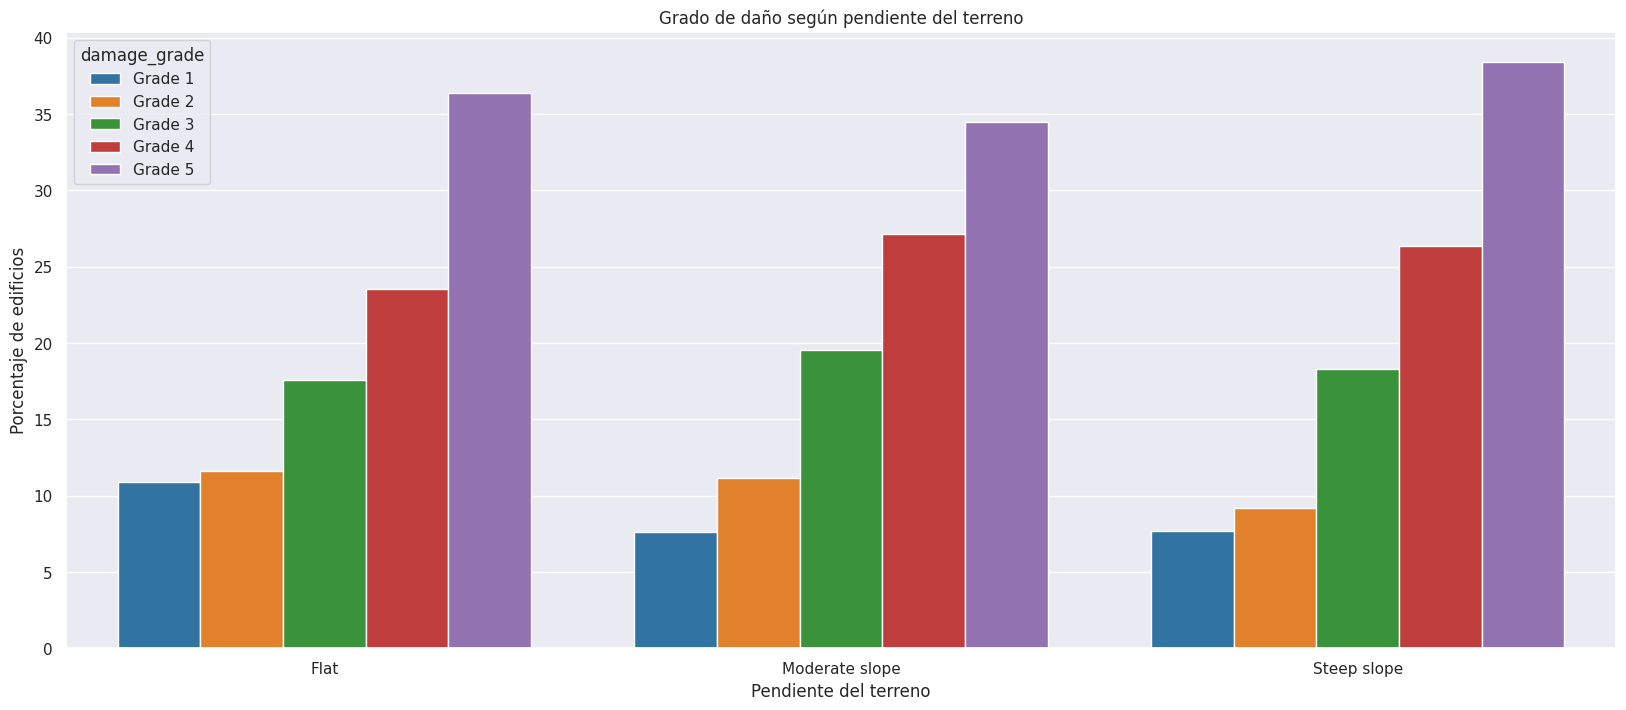

In [ ]:
sns.barplot(data=df_daño_superficie , x='land_surface_condition', y= "count", hue = "damage_grade")
sns.set(rc = {'figure.figsize':(20,8)})
sns.set_palette ('tab10')
plt.title("Grado de daño según pendiente del terreno")
plt.xlabel("Pendiente del terreno")
plt.ylabel("Porcentaje de edificios")
plt.show()

Se observa que en proporción las construcciones sobre pendientes moderadas a pronunciadas fueron las que daño mas severo sufrieron.

##**Análisis según el tipo de piso**

Se espera que las edificaciones más sismoresistentes sean las que tienen pisos de cemento reforzado.

Text(0, 0.5, 'Frecuencia absoluta')

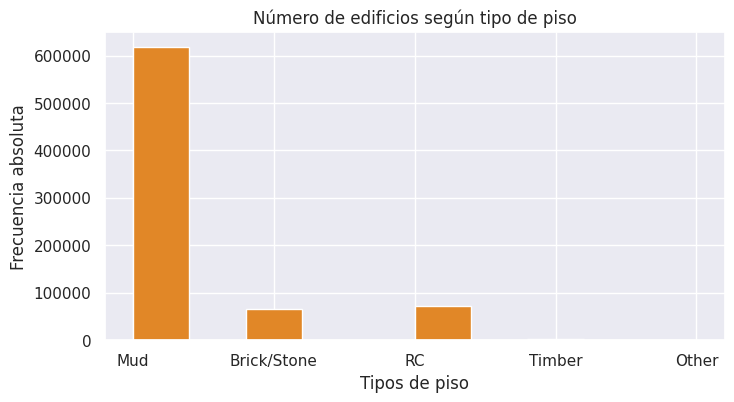

In [ ]:
#Analizando el número de edificios de acuerdo al tipo de piso
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(df_estructura['ground_floor_type'], bins=10,  color='#E18727')
ax.set_title('Número de edificios según tipo de piso')
ax.set_xlabel('Tipos de piso')
ax.set_ylabel('Frecuencia absoluta')

In [ ]:
#Analizando el grado de daño sufrido por las edificaciones según el tipo de piso
df_daño_piso = df_estructura.groupby(['ground_floor_type','damage_grade']).size().reset_index(name='count')
df_daño_piso

,ground_floor_type,damage_grade,count
0,Brick/Stone,Grade 1,5906
1,Brick/Stone,Grade 2,6721
2,Brick/Stone,Grade 3,10833
3,Brick/Stone,Grade 4,16592
4,Brick/Stone,Grade 5,26041
5,Mud,Grade 1,38073
6,Mud,Grade 2,59487
7,Mud,Grade 3,114001
8,Mud,Grade 4,161466
9,Mud,Grade 5,245178


In [ ]:
df_daño_piso= df_daño_piso.set_index(['ground_floor_type', 'damage_grade'])
df_daño_piso

count
ground_floor_type damage_grade        
Brick/Stone       Grade 1         5906
                  Grade 2         6721
                  Grade 3        10833
                  Grade 4        16592
                  Grade 5        26041
Mud               Grade 1        38073
                  Grade 2        59487
                  Grade 3       114001
                  Grade 4       161466
                  Grade 5       245178
Other             Grade 1          291
                  Grade 2          200
                  Grade 3          239
                  Grade 4          176
                  Grade 5          147
RC                Grade 1        33862
                  Grade 2        20173
                  Grade 3        10813
                  Grade 4         4864
                  Grade 5         3437
Timber            Grade 1          683
                  Grade 2          676
                  Grade 3          526
                  Grade 4          746
                  Grade 5          963

In [ ]:
df_daño_piso = df_daño_piso.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

<ipython-input-68-48f41304cc30>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_daño_piso = df_daño_piso.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()


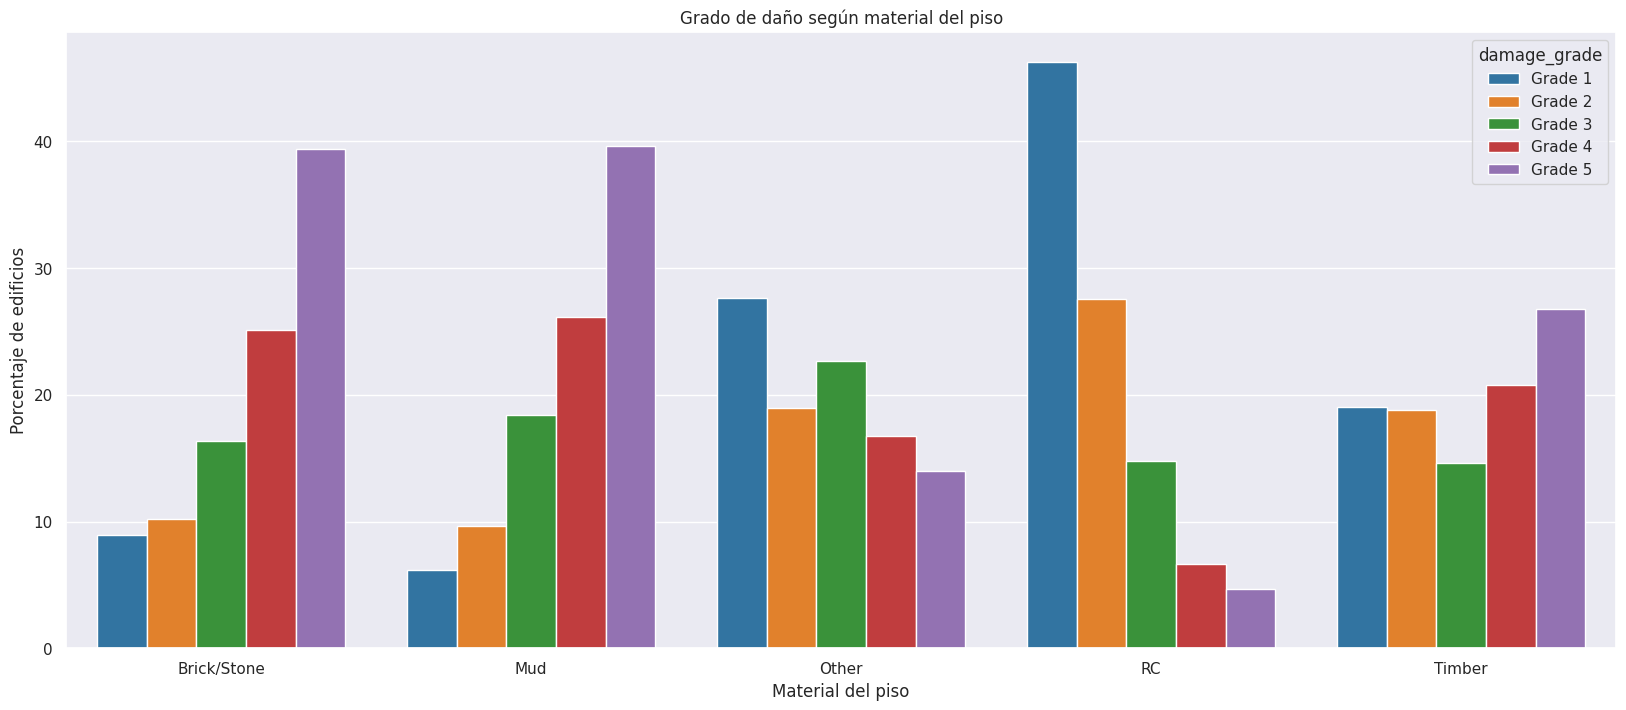

In [ ]:
sns.barplot(data=df_daño_piso , x='ground_floor_type', y= "count", hue = "damage_grade")
sns.set(rc = {'figure.figsize':(20,8)})
sns.set_palette ('tab10')
plt.title("Grado de daño según material del piso")
plt.xlabel("Material del piso")
plt.ylabel("Porcentaje de edificios")
plt.show()

Mayor proporción de daños severos en edificios con piso de fango y ladrillo/piedra

In [ ]:
#Analizando el conteo de pisos pre y post terremoto en base a su material
df_pisos_material = df_estructura.groupby(["ground_floor_type"]).sum().reset_index()[["ground_floor_type","count_floors_pre_eq","count_floors_post_eq"]]
df_pisos_material

<ipython-input-79-a7aea2ab044a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_pisos_material = df_estructura.groupby(["ground_floor_type"]).sum().reset_index()[["ground_floor_type","count_floors_pre_eq","count_floors_post_eq"]]


,ground_floor_type,count_floors_pre_eq,count_floors_post_eq
0,Brick/Stone,137605,78010
1,Mud,1304882,737428
2,Other,1907,1551
3,RC,140743,132745
4,Timber,5953,4446


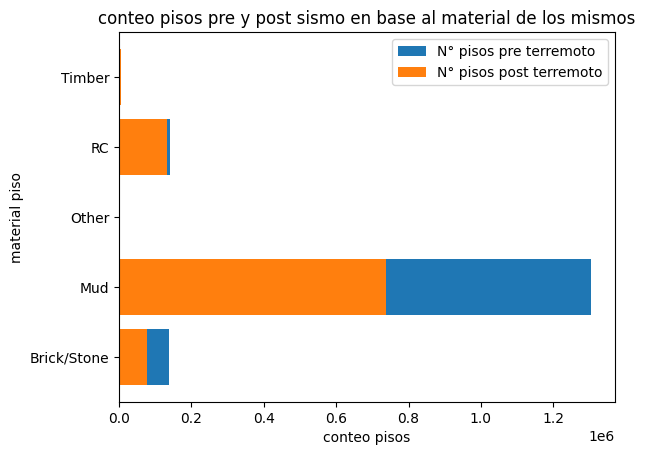

In [ ]:
#Analizando el conteo de pisos pre y post terremoto en base al material de los pisos
fig, ax = plt.subplots()
ax.barh(df_pisos_material['ground_floor_type'], df_pisos_material['count_floors_pre_eq'], label ='N° pisos pre terremoto')
ax.barh(df_pisos_material['ground_floor_type'], df_pisos_material['count_floors_post_eq'],label ='N° pisos post terremoto')

ax.set_xlabel("conteo pisos")
ax.set_ylabel('material piso')
ax.set_title('conteo pisos pre y post sismo en base al material de los mismos')
ax.legend()

Se observa que los pisos más sismoresistentes fueron los hechos de cemento reforzado

##**Análisis según la configuración/ forma en el plano**

Text(0, 0.5, 'Frecuencia absoluta')

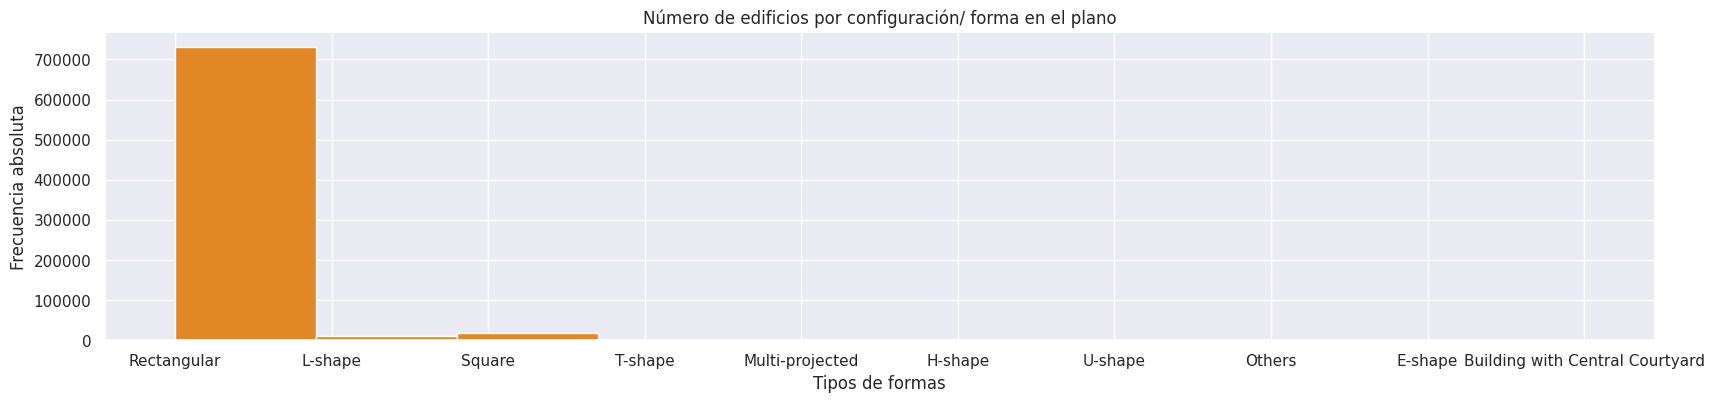

In [ ]:
#Analizando el número de edificios de acuerdo a sus formas
fig, ax = plt.subplots(figsize=(20, 4))
ax.hist(df_estructura['plan_configuration'], bins=10,  color='#E18727')
ax.set_title('Número de edificios por configuración/ forma en el plano')
ax.set_xlabel('Tipos de formas')
ax.set_ylabel('Frecuencia absoluta')

La mayoría de los edificios tenían una configuración rectangular

In [ ]:
#Analizando el grado de daño sufrido por las edificaciones según la geometría de la construcción
df_daño_forma = df_estructura.groupby(['plan_configuration','damage_grade']).size().reset_index(name='count')


In [ ]:
df_daño_forma= df_daño_forma.set_index(['plan_configuration', 'damage_grade'])
df_daño_forma

count
plan_configuration              damage_grade        
Building with Central Courtyard Grade 1           32
                                Grade 2           32
                                Grade 3           16
                                Grade 4            9
                                Grade 5            9
E-shape                         Grade 1           18
                                Grade 2           25
                                Grade 3           29
                                Grade 4           29
                                Grade 5           39
H-shape                         Grade 1            9
                                Grade 2           14
                                Grade 3           17
                                Grade 4           23
                                Grade 5           17
L-shape                         Grade 1         2781
                                Grade 2         2209
                                Grade 3         2096
                                Grade 4         1798
                                Grade 5         1195
Multi-projected                 Grade 1          270
                                Grade 2          201
                                Grade 3          253
                                Grade 4          158
                                Grade 5           58
Others                          Grade 1          222
                                Grade 2           64
                                Grade 3          121
                                Grade 4           61
                                Grade 5           50
Rectangular                     Grade 1        72627
                                Grade 2        82507
                                Grade 3       131216
                                Grade 4       178268
                                Grade 5       266628
Square                          Grade 1         2572
                                Grade 2         1888
                                Grade 3         2348
                                Grade 4         3236
                                Grade 5         7532
T-shape                         Grade 1          170
                                Grade 2          215
                                Grade 3          221
                                Grade 4          186
                                Grade 5          177
U-shape                         Grade 1          114
                                Grade 2          102
                                Grade 3           95
                                Grade 4           76
                                Grade 5           61

In [ ]:
df_daño_forma = df_daño_forma.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

<ipython-input-73-7a065b54039d>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_daño_forma = df_daño_forma.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()


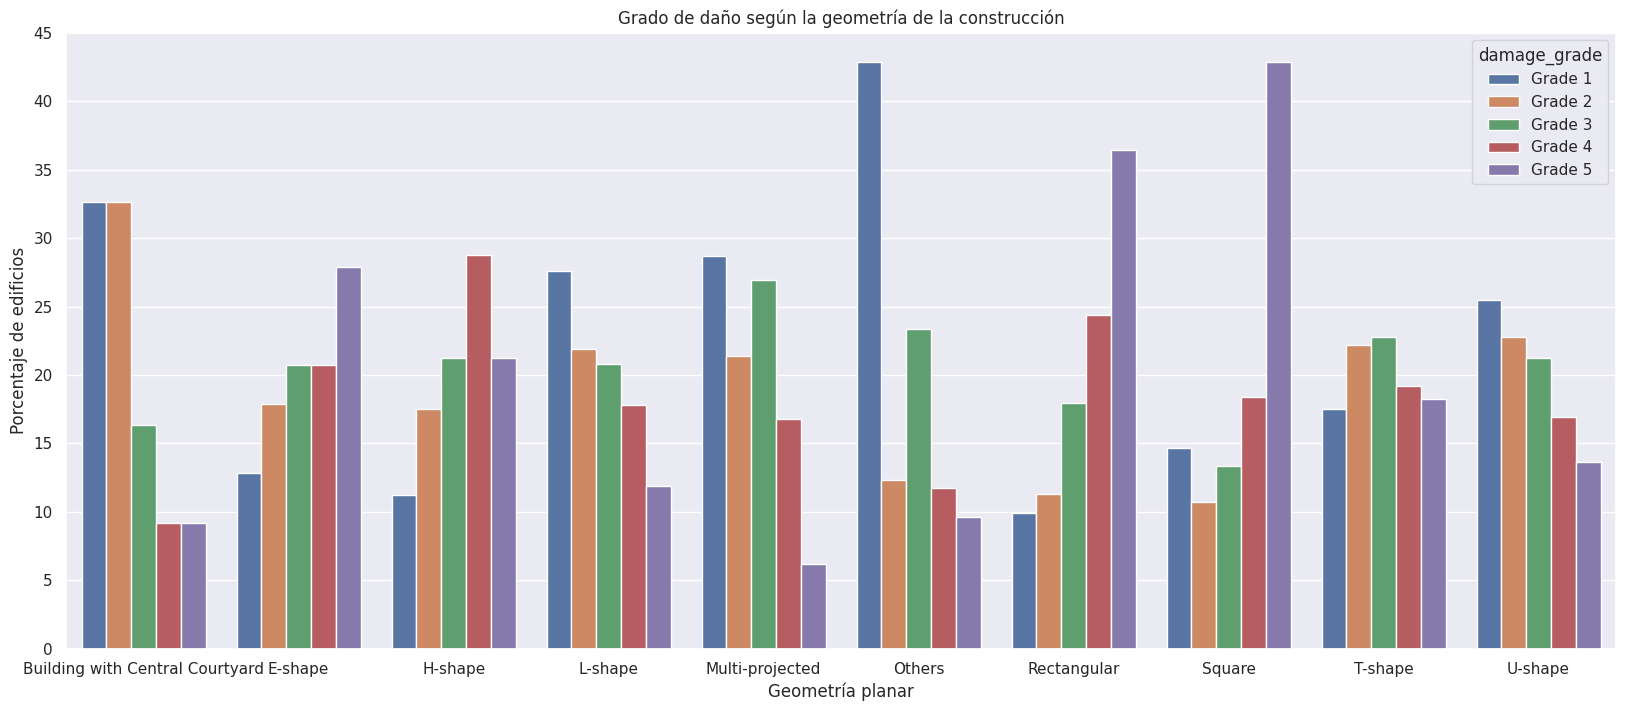

In [ ]:
sns.barplot(data=df_daño_forma , x='plan_configuration', y= "count", hue = "damage_grade")
sns.set(rc = {'figure.figsize':(20,8)})
sns.set_palette('tab10')
plt.title("Grado de daño según la geometría de la construcción")
plt.xlabel("Geometría planar")
plt.ylabel("Porcentaje de edificios")
plt.show()

##**Conclusiones preliminares por medio de EDA**

Se observa que la mayor parte de los edificios sufrieron un grado severo de daño (5).

Se observa que la mayoría de los edificios estaban hechos de fango y piedra /ladrillo, y que los que mayor daño sufrieron, fueron los construidos con adobe y piedra. En cambio, las edificaciones mas sismorresistentes fueron las que contaban con cemento reforzado

La mayor parte de las edificaciones poseían techos de bamboo y madera, siendo los edificios con este material de techo los que mayor daño sufrieron.

La mayor parte de las edificaciones estaban realizadas sobre superficies llanas. Gráficamente no se observa una gran incidencia de la pendiente, aunque si se registraron mayores daños en las  las construcciones hechas sobre pendientes moderadas a pronunciadas.

La mayor parte de los pisos estaban hechos de fango, y la mayor proporción de daños severos se vio expresada en pisos de dicho material y de ladrillo/piedra.


Las  edificaciones que mayores daños sufrieron fueron las de geometría rectangular y cuadrada, y las que menos, las construcciones multiproyectadas, y en forma de L.

#**Aplicación de ML**

*   Objetivo: Se intentará formular un modelo que explique y prediga el nivel de daño que pudiera sufrir una edificación en base a su material fundacional, número de pisos pre y post sismo, area de la edificación, altura de la edificación pre y post sismo, edad de los edificios.
*  Tipo de aprendizaje: Supervisado, se sabe la variable respuesta
*  Subtipo: de clasificación, la variable respuesta es categórica.





A continuación, se trabajará con los datos para poder aplicar ML. Primero se definirán X e Y.
A continunación se dividirá el dataset en train y test y luego se realizarán procesos de one hot encoding sobre variables categóricas, normalización y PCA.

In [ ]:
#Definiendo X e Y
#El ID del edificio no aportaría información al modelo, en cuanto que las columnas "condition_post_eq" y "technia_solution_proposed" nos aportan información post-cataclismo y con ello un data leakege, por lo que también proceden a descartarse.
X= df_estructura.drop(['damage_grade','condition_post_eq','count_floors_post_eq','technical_solution_proposed'], axis=1)
y= df_estructura ['damage_grade']

In [ ]:
#Cambio el nombre de las clases por números, para luego poder aplicar XGBoost sin inconvienientes
df_estructura ['damage_grade'] = df_estructura ['damage_grade'].replace ({"Grade 1": 0,"Grade 2": 1, "Grade 3" : 2, "Grade 4" : 3, "Grade 5"  : 4})


In [ ]:
# contar el numero de registros vacíos por columnas
nun_missing_X = X.isnull().sum().reset_index()
print(nun_missing_X)

                                     index  0
0                              district_id  0
1                                vdcmun_id  0
2                                  ward_id  0
3                      count_floors_pre_eq  0
4                             age_building  0
5                        plinth_area_sq_ft  0
6                         height_ft_pre_eq  0
7                        height_ft_post_eq  0
8                   land_surface_condition  0
9                          foundation_type  0
10                               roof_type  0
11                       ground_floor_type  0
12                        other_floor_type  0
13                                position  0
14                      plan_configuration  0
15            has_superstructure_adobe_mud  0
16     has_superstructure_mud_mortar_stone  0
17           has_superstructure_stone_flag  0
18  has_superstructure_cement_mortar_stone  0
19     has_superstructure_mud_mortar_brick  0
20  has_superstructure_cement_mort

Recordar que, al observar las clases:
         
*   0= Grado 1,
*   1= Grado 2,
*   2= Grado 3,
*   3= Grado 4,
*   4= Grado 5


In [ ]:
X

,district_id,vdcmun_id,ward_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,...,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
building_id,,,,,,,,,,,,,,,,,,,,,
120101000011,12,1207,120703,1,9,288,9,9,Flat,Other,...,1,0,0,0,0,0,1,0,0,0
120101000021,12,1207,120703,1,15,364,9,9,Flat,Other,...,1,0,0,0,0,0,1,0,0,0
120101000031,12,1207,120703,1,20,384,9,9,Flat,Other,...,1,0,0,0,0,0,0,0,0,0
120101000041,12,1207,120703,1,20,312,9,9,Flat,Other,...,1,0,0,0,0,0,0,0,0,0
120101000051,12,1207,120703,1,30,308,9,9,Flat,Other,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366709001231,36,3603,360302,2,13,513,18,18,Flat,Mud mortar-Stone/Brick,...,1,0,0,0,0,0,0,0,0,0
366709001241,36,3603,360302,2,60,165,18,0,Flat,Mud mortar-Stone/Brick,...,1,0,0,0,0,0,0,0,0,0
366709001251,36,3603,360302,2,35,342,18,0,Flat,Mud mortar-Stone/Brick,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
y

building_id
120101000011    Grade 3
120101000021    Grade 5
120101000031    Grade 2
120101000041    Grade 2
120101000051    Grade 1
                 ...   
366709001231    Grade 1
366709001241    Grade 5
366709001251    Grade 5
366709001261    Grade 5
366709001271    Grade 5
Name: damage_grade, Length: 717369, dtype: object

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Spliteo el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y )


In [ ]:
y_train

building_id
311504000391    Grade 4
230904000621    Grade 5
243004000612    Grade 5
200501000421    Grade 4
303503000021    Grade 4
                 ...   
201407000091    Grade 5
302403001381    Grade 3
365802000762    Grade 3
365004017031    Grade 4
203406000663    Grade 2
Name: damage_grade, Length: 573895, dtype: object

In [ ]:
y_test

building_id
361408002541    Grade 4
221503000601    Grade 4
285904000381    Grade 5
205406000931    Grade 2
312407001851    Grade 2
                 ...   
230108000852    Grade 1
364508000521    Grade 4
283003000611    Grade 5
303505020121    Grade 1
360803002131    Grade 3
Name: damage_grade, Length: 143474, dtype: object

##**Tratamiento de variables categóricas**

In [ ]:
#Seleccionando variables categóricas del DF
estructura_cat=['land_surface_condition', 'district_id','foundation_type','roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration']
estructura_cat

['land_surface_condition',
 'district_id',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration']

In [ ]:
X_train_cat = X_train [estructura_cat]
X_test_cat = X_test [estructura_cat]

In [ ]:
X_train_cat

,land_surface_condition,district_id,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration
building_id,,,,,,,,
311504000391,Moderate slope,31,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular
230904000621,Flat,23,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular
243004000612,Flat,24,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular
200501000421,Flat,20,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular
303503000021,Flat,30,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Brick/Stone,Timber-Planck,Not attached,Rectangular
...,...,...,...,...,...,...,...,...
201407000091,Moderate slope,20,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular
302403001381,Flat,30,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular
365802000762,Flat,36,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular


In [ ]:
X_test_cat

,land_surface_condition,district_id,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration
building_id,,,,,,,,
361408002541,Flat,36,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Attached-1 side,Rectangular
221503000601,Flat,22,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular
285904000381,Flat,28,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular
205406000931,Flat,20,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Brick/Stone,TImber/Bamboo-Mud,Not attached,Rectangular
312407001851,Moderate slope,31,Bamboo/Timber,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular
...,...,...,...,...,...,...,...,...
230108000852,Flat,23,RC,RCC/RB/RBC,RC,RCC/RB/RBC,Attached-1 side,Rectangular
364508000521,Moderate slope,36,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Attached-1 side,Multi-projected
283003000611,Flat,28,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular


In [ ]:
# one hot encoding en variables categoricas
ohe = OneHotEncoder(sparse_output=False)

In [ ]:
#ohe en variables categóricas de X_train
ohe_estructura_cat_train = ohe.fit_transform (X_train_cat [estructura_cat])
X_train_ohe_cat = pd.DataFrame(data = ohe_estructura_cat_train, columns = ohe.get_feature_names_out())

In [ ]:
#ohe en variables categóricas de X_test
ohe_estructura_cat_test = ohe.transform (X_test_cat [estructura_cat])
X_test_ohe_cat = pd.DataFrame(data = ohe_estructura_cat_test, columns = ohe.get_feature_names_out())

In [ ]:
X_test_ohe_cat

,land_surface_condition_Flat,land_surface_condition_Moderate slope,land_surface_condition_Steep slope,district_id_12,district_id_20,district_id_21,district_id_22,district_id_23,district_id_24,district_id_28,...,plan_configuration_Building with Central Courtyard,plan_configuration_E-shape,plan_configuration_H-shape,plan_configuration_L-shape,plan_configuration_Multi-projected,plan_configuration_Others,plan_configuration_Rectangular,plan_configuration_Square,plan_configuration_T-shape,plan_configuration_U-shape
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143469,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
143470,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
143471,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
143472,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


##**Tratamiento de variables numéricas**

In [ ]:
#Seleccionando variables numéricas del DF
estructura_num=X.select_dtypes('int').columns.tolist()
estructura_num

['count_floors_pre_eq',
 'age_building',
 'plinth_area_sq_ft',
 'height_ft_pre_eq',
 'height_ft_post_eq',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other']

In [ ]:
X_train_num = X_train [estructura_num]
X_test_num = X_test [estructura_num]

In [ ]:
X_train_num

,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
building_id,,,,,,,,,,,,,,,,
311504000391,1,10,300,10,10,0,1,0,0,0,0,0,0,0,0,0
230904000621,3,35,383,18,0,0,1,0,0,0,0,0,0,0,0,0
243004000612,2,11,445,16,0,0,1,0,0,1,0,1,0,0,0,0
200501000421,2,25,544,17,17,0,1,0,0,0,0,1,0,0,0,0
303503000021,3,20,265,24,24,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201407000091,2,6,300,15,0,0,1,0,0,0,0,0,0,0,0,0
302403001381,3,45,391,18,18,0,1,0,0,0,0,0,0,0,0,0
365802000762,2,7,480,15,15,0,1,0,0,0,0,1,0,0,0,0


In [ ]:
X_test_num

,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
building_id,,,,,,,,,,,,,,,,
361408002541,2,10,180,16,16,0,1,0,0,0,0,1,0,0,0,0
221503000601,2,19,512,12,12,0,1,0,0,0,0,0,0,0,0,0
285904000381,3,20,280,18,0,0,1,0,0,0,0,0,0,0,0,0
205406000931,2,10,80,30,38,0,1,0,0,0,0,0,0,0,0,0
312407001851,1,12,198,8,8,0,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230108000852,3,1,650,24,24,0,0,0,0,0,1,0,0,0,1,0
364508000521,2,16,390,15,15,0,1,0,0,0,0,0,0,0,0,0
283003000611,2,3,420,18,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Normalize según valores mínimos y máximos de cada variable
def normalize(df):
  result = df.copy()

  for feature_name in df.columns:
        max_val = df[feature_name].max()
        min_val = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_val) / (max_val - min_val)

  return result

In [ ]:
X_train_num_norma = normalize(X_train_num)
X_test_num_norma = normalize(X_test_num)


In [ ]:
X_test_num_norma

,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
building_id,,,,,,,,,,,,,,,,
361408002541,0.125,0.010010,0.160584,0.107527,0.161616,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
221503000601,0.125,0.019019,0.645255,0.064516,0.121212,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
285904000381,0.250,0.020020,0.306569,0.129032,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
205406000931,0.125,0.010010,0.014599,0.258065,0.383838,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
312407001851,0.000,0.012012,0.186861,0.021505,0.080808,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230108000852,0.250,0.001001,0.846715,0.193548,0.242424,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
364508000521,0.125,0.016016,0.467153,0.096774,0.151515,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
283003000611,0.125,0.003003,0.510949,0.129032,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Aplicando PCA en X_train normalizado
pca_train = PCA()
X_train_num_norma_pca = pd.DataFrame(pca_train.fit_transform (X_train_num_norma))

In [ ]:
#Chequeo del PCA en train
pca_train.explained_variance_ratio_

array([0.32939518, 0.22779539, 0.08516337, 0.06773289, 0.05603181,
       0.0507111 , 0.04287994, 0.03710945, 0.02740945, 0.01951373,
       0.01703206, 0.01340098, 0.01035618, 0.00780894, 0.00599912,
       0.0016604 ])

El análisis nos dice que las últimas 6 columnas no alcanzan a explicar el 2% del dataset original, y por lo tanto se descartan

In [ ]:
X_train_num_norm_pca_91= X_train_num_norma_pca.iloc[:, :10]

In [ ]:
#Aplicando PCA en X_test normalizado
pca_test= PCA()
X_test_num_norma_pca = pd.DataFrame(pca_test.fit_transform (X_test_num_norma))

In [ ]:
#Chequeo del PCA en test
pca_test.explained_variance_ratio_

array([0.32856551, 0.22871538, 0.08547167, 0.06761099, 0.05602537,
       0.05083507, 0.04294152, 0.03692129, 0.0270985 , 0.01931253,
       0.01718845, 0.01342276, 0.01058599, 0.00763971, 0.00599867,
       0.00166657])

El análisis nos dice que las últimas 6 columnas no alcanzan a explicar el 2% del dataset original, y por lo tanto se descartan

In [ ]:
X_test_num_norm_pca_91= X_test_num_norma_pca.iloc[:, :10]


##**Uniendo los datasets generados para aplicar los modelos**


In [ ]:
# Reseteando índices
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
X_train_num_norm_pca_91.reset_index(drop=True, inplace=True)
X_test_num_norm_pca_91.reset_index(drop=True, inplace=True)
X_test_ohe_cat.reset_index(drop=True, inplace=True)
X_train_ohe_cat.reset_index(drop=True, inplace=True)
X_train_num_norma.reset_index(drop=True, inplace=True)
X_test_num_norma.reset_index(drop=True, inplace=True)

In [ ]:
#Uniendo los DF's
X_train = pd.concat ([X_train_num_norm_pca_91,X_train_ohe_cat], axis=1)
X_test = pd.concat ([X_test_num_norm_pca_91,X_test_ohe_cat], axis=1)

In [ ]:

X_train.isna().sum().sum()

0

In [ ]:
X_test.isna().sum().sum()

0

##**Conteo de clases**


In [ ]:
y.value_counts()

Grade 5    266412
Grade 4    177573
Grade 3    129031
Grade 2     78998
Grade 1     65355
Name: damage_grade, dtype: int64

Se observa que las clases estan desbalanceadas (como bien pudo apreciarse en el primer apartado de EDA) , por lo tanto, darle peso a la métrica de Accuracy no sería correcto para ninguno de los modelos empleados.

##**Convirtiendo todas las variables a datos tipo string**

In [ ]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)


#**Modelos de ML**


Se procederá a evaluar nuestro dataset con 4 modelos : regresión logística, decisition tree, random forest y KNN, realizando una validación cruzada.


In [ ]:
#Importación librerias
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean

In [ ]:
#Creación del procedimiento (cv) "StratifiedKFold". Se emplearán 5 particiones/ pliegues(folds) para realizar la validación cruzada.
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle =True)


##**Evaluación de la métrica F1 con crossvalidation, habiendo aplicado PCA**

In [ ]:
#Evaluación de la métrica f1 en Decisition tree
model_tree= DecisionTreeClassifier()

In [ ]:
f1_tree = cross_val_score (model_tree, X_train, y_train, scoring = 'f1_macro', cv =skf, verbose =1)
print ("F1 en decisition tree:",f1_tree)

F1 en decisition tree: [0.52359779 0.52355921 0.52241199 0.5227497  0.52344157]


In [ ]:
mean (f1_tree) # Promedio F1 en Decisition Tree

0.5231520501227511

In [ ]:
#Evaluación de la métrica f1 en Logistic Regression
model = LogisticRegression(solver='liblinear')
f1_LogRe = cross_val_score (model, X_train, y_train, scoring = 'f1_macro', cv =skf, verbose =1)
print ("F1 en regresión logística:",f1_LogRe)

F1 en regresión logística: [0.36764007 0.36892704 0.3679627  0.36549794 0.3678791 ]


In [ ]:
mean (f1_LogRe) # Promedio F1 en Regresión logística

0.367581368788864

In [ ]:
#Evaluación de la métrica f1 en Random Forest
clf = RandomForestClassifier (max_depth =5, random_state= 0)
f1_forest = cross_val_score (clf, X_train, y_train, scoring = 'f1_macro', cv =skf, verbose =1)
print ("F1 en random forest:",f1_forest)

F1 en random forest: [0.35857974 0.36134835 0.35456759 0.35494437 0.36165739]


In [ ]:
mean (f1_forest) # Promedio F1 en Random Forest

0.35821948890431227

In [ ]:
#Evaluación de la métrica f1 en KNN
knn_model = KNeighborsClassifier(n_neighbors = 5)
f1_knn = cross_val_score (knn_model, X_train, y_train, scoring = 'f1_macro', cv =skf, verbose =1)
print ("F1 en KNN:",f1_knn)

F1 en KNN: [0.514377   0.51402721 0.51261733 0.51179755 0.5120606 ]


In [ ]:
mean (f1_knn) # Promedio F1 en KNN

0.5129759371722229

Se observan valores relativamente bajos para F1-score en los modelos evaluados, se procede a evaluarlos sin aplicar PCA.

##**Segunda evaluación de modelos de ML utilizando crossvalidation, pero sin aplicar PCA**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

In [ ]:
#Definiendo X e Y
#El ID del edificio no aportaría información al modelo, en cuanto que las columnas "condition_post_eq" y "technia_solution_proposed" nos aportan información post-cataclismo y con ello un data leakege, por lo que también proceden a descartarse.
X= df_estructura.drop(['damage_grade','condition_post_eq','count_floors_post_eq','technical_solution_proposed'], axis=1)
y= df_estructura ['damage_grade']

In [ ]:
#Cambio el nombre de las clases por números, para luego poder aplicar XGBoost sin inconvienientes
df_estructura ['damage_grade'] = df_estructura ['damage_grade'].replace ({"Grade 1": 0,"Grade 2": 1, "Grade 3" : 2, "Grade 4" : 3, "Grade 5"  : 4})


Recordar que, al observar las clases:
         
*   0= Grado 1,
*   1= Grado 2,
*   2= Grado 3,
*   3= Grado 4,
*   4= Grado 5


In [ ]:
#Spliteo el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y )


In [ ]:
X_test.isna().sum().sum()

0

In [ ]:
X_train

,district_id,vdcmun_id,ward_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,...,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
building_id,,,,,,,,,,,,,,,,,,,,,
311504000391,31,3105,310504,1,10,300,10,10,Moderate slope,Mud mortar-Stone/Brick,...,1,0,0,0,0,0,0,0,0,0
230904000621,23,2306,230612,3,35,383,18,0,Flat,Mud mortar-Stone/Brick,...,1,0,0,0,0,0,0,0,0,0
243004000612,24,2408,240806,2,11,445,16,0,Flat,Mud mortar-Stone/Brick,...,1,0,0,1,0,1,0,0,0,0
200501000421,20,2003,200306,2,25,544,17,17,Flat,Mud mortar-Stone/Brick,...,1,0,0,0,0,1,0,0,0,0
303503000021,30,3009,300902,3,20,265,24,24,Flat,Mud mortar-Stone/Brick,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201407000091,20,2003,200301,2,6,300,15,0,Moderate slope,Mud mortar-Stone/Brick,...,1,0,0,0,0,0,0,0,0,0
302403001381,30,3006,300605,3,45,391,18,18,Flat,Mud mortar-Stone/Brick,...,1,0,0,0,0,0,0,0,0,0
365802000762,36,3610,361004,2,7,480,15,15,Flat,Mud mortar-Stone/Brick,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
#Pipeline para variables categóricas
pipeline_cat = Pipeline(steps=[(('one_hot_enc', OneHotEncoder(handle_unknown='ignore')))])

In [ ]:
# Pipeline para features numéricas
pipeline_num = Pipeline(steps=[('std_scaler', StandardScaler())])

In [ ]:
# Concatenando pipelines (especificando columnas en las que se aplicara el procedimiento)
prep_pipeline = ColumnTransformer(
    transformers=[
         ('pipeline_cat', pipeline_cat, ['land_surface_condition', 'district_id','foundation_type','roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration']),
         ('pipeline_num', pipeline_num, ['age_building','count_floors_pre_eq','plinth_area_sq_ft','height_ft_pre_eq', 'height_ft_post_eq', "has_superstructure_adobe_mud","has_superstructure_mud_mortar_stone", "has_superstructure_stone_flag","has_superstructure_cement_mortar_stone","has_superstructure_mud_mortar_brick","has_superstructure_cement_mortar_brick","has_superstructure_timber","has_superstructure_bamboo","has_superstructure_rc_non_engineered","has_superstructure_rc_engineered","has_superstructure_other"])
    ])

In [ ]:
# Aplicando pipeline de preprocesamiento de datos en train
X_train_prep= prep_pipeline.fit_transform (X_train)
X_train= pd.DataFrame(X_train_prep, columns=prep_pipeline.get_feature_names_out())

In [ ]:
X_train

,pipeline_cat__land_surface_condition_Flat,pipeline_cat__land_surface_condition_Moderate slope,pipeline_cat__land_surface_condition_Steep slope,pipeline_cat__district_id_12,pipeline_cat__district_id_20,pipeline_cat__district_id_21,pipeline_cat__district_id_22,pipeline_cat__district_id_23,pipeline_cat__district_id_24,pipeline_cat__district_id_28,...,pipeline_num__has_superstructure_mud_mortar_stone,pipeline_num__has_superstructure_stone_flag,pipeline_num__has_superstructure_cement_mortar_stone,pipeline_num__has_superstructure_mud_mortar_brick,pipeline_num__has_superstructure_cement_mortar_brick,pipeline_num__has_superstructure_timber,pipeline_num__has_superstructure_bamboo,pipeline_num__has_superstructure_rc_non_engineered,pipeline_num__has_superstructure_rc_engineered,pipeline_num__has_superstructure_other
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.462917,-0.191463,-0.119313,-0.150288,-0.247981,-0.601723,-0.300611,-0.175748,-0.09256,-0.110533
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.462917,-0.191463,-0.119313,-0.150288,-0.247981,-0.601723,-0.300611,-0.175748,-0.09256,-0.110533
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.462917,-0.191463,-0.119313,6.653882,-0.247981,1.661893,-0.300611,-0.175748,-0.09256,-0.110533
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.462917,-0.191463,-0.119313,-0.150288,-0.247981,1.661893,-0.300611,-0.175748,-0.09256,-0.110533
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.462917,-0.191463,-0.119313,-0.150288,-0.247981,1.661893,-0.300611,-0.175748,-0.09256,-0.110533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573890,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.462917,-0.191463,-0.119313,-0.150288,-0.247981,-0.601723,-0.300611,-0.175748,-0.09256,-0.110533
573891,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.462917,-0.191463,-0.119313,-0.150288,-0.247981,-0.601723,-0.300611,-0.175748,-0.09256,-0.110533
573892,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.462917,-0.191463,-0.119313,-0.150288,-0.247981,1.661893,-0.300611,-0.175748,-0.09256,-0.110533
573893,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.462917,-0.191463,-0.119313,-0.150288,-0.247981,-0.601723,-0.300611,-0.175748,-0.09256,-0.110533


In [ ]:
X_train.isna().sum().sum()

0

In [ ]:
# Replicando pipeline de preprocesamiento de datos de test
X_test_prep = prep_pipeline.transform (X_test)
X_test = pd.DataFrame(X_test_prep, columns=prep_pipeline.get_feature_names_out())

In [ ]:
X_test

,pipeline_cat__land_surface_condition_Flat,pipeline_cat__land_surface_condition_Moderate slope,pipeline_cat__land_surface_condition_Steep slope,pipeline_cat__district_id_12,pipeline_cat__district_id_20,pipeline_cat__district_id_21,pipeline_cat__district_id_22,pipeline_cat__district_id_23,pipeline_cat__district_id_24,pipeline_cat__district_id_28,...,pipeline_num__has_superstructure_mud_mortar_stone,pipeline_num__has_superstructure_stone_flag,pipeline_num__has_superstructure_cement_mortar_stone,pipeline_num__has_superstructure_mud_mortar_brick,pipeline_num__has_superstructure_cement_mortar_brick,pipeline_num__has_superstructure_timber,pipeline_num__has_superstructure_bamboo,pipeline_num__has_superstructure_rc_non_engineered,pipeline_num__has_superstructure_rc_engineered,pipeline_num__has_superstructure_other
building_id,,,,,,,,,,,,,,,,,,,,,
361408002541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221503000601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285904000381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205406000931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
312407001851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230108000852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364508000521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283003000611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
X_test.isna().sum().sum()

0

###**Evaluación de la métrica F1**

In [ ]:
#Importación librerias
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean

In [ ]:
#Creación del procedimiento (cv) "StratifiedKFold". Se emplearán 5 particiones/ pliegues(folds)
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle =True)


In [ ]:
#Evaluación de la métrica f1 en Decisition tree
model_tree= DecisionTreeClassifier()

In [ ]:
f1_tree = cross_val_score (model_tree, X_train, y_train, scoring = 'f1_macro', cv =skf, verbose =1)
print ("F1 en decisition tree:",f1_tree)

F1 en decisition tree: [0.53101252 0.53118574 0.53125222 0.52948565 0.53238235]


In [ ]:
mean (f1_tree) # Promedio F1 en Decisition Tree

0.5310636949524753

In [ ]:
#Evaluación de la métrica f1 en Logistic Regression
model = LogisticRegression(solver='liblinear')

In [ ]:
f1_LogRe = cross_val_score (model, X_train, y_train, scoring = 'f1_macro', cv =skf, verbose =1)
print ("F1 en regresión logística:",f1_LogRe)

F1 en regresión logística: [0.47753741 0.47831326 0.48100696 0.4756994  0.47702489]


In [ ]:
mean (f1_LogRe) # Promedio F1 en Regresión logística

0.47791638665071207

In [ ]:
#Evaluación de la métrica f1 en Random Forest
clf = RandomForestClassifier (max_depth =5, random_state= 0)

In [ ]:
f1_forest = cross_val_score (clf, X_train, y_train, scoring = 'f1_macro', cv =skf, verbose =1)
print ("F1 en random forest:",f1_forest)

F1 en random forest: [0.43572077 0.43445328 0.43412422 0.43292566 0.43184283]


In [ ]:
mean (f1_forest) # Promedio F1 en Random Forest

0.43381335183912373

In [ ]:
#Evaluación de la métrica f1 en KNN
knn_model = KNeighborsClassifier(n_neighbors = 5)

In [ ]:
f1_knn = cross_val_score (knn_model, X_train, y_train, scoring = 'f1_macro', cv =skf, verbose =1)
print ("F1 en KNN:",f1_knn)

F1 en KNN: [0.56321618 0.56304069 0.5631546  0.56256748 0.56149259]


In [ ]:
mean (f1_knn) # Promedio F1 en KNN

0.5626943082808957

###**Evaluación de la métrica Recall**

In [ ]:
#Evaluación de la métrica Recall en Regresión Logística
Recall_LogRe = cross_val_score (model, X_train, y_train, scoring = 'recall_macro', cv =skf, verbose =1)
print ("Recall en regresión logística:",Recall_LogRe)

Recall en regresión logística: [0.50883668 0.50940903 0.51076595 0.50763667 0.5077676 ]


In [ ]:
mean (Recall_LogRe) # Promedio Recall en Regresión logística

0.5088831855531352

In [ ]:
#Evaluación de la métrica Recall en Decisition Tree
Recall_tree = cross_val_score (model_tree, X_train, y_train, scoring = 'recall_macro', cv =skf, verbose =1)
print ("Recall en decisition tree:",Recall_tree)

Recall en decisition tree: [0.53234104 0.53011555 0.53210817 0.52961319 0.5333531 ]


In [ ]:
mean(Recall_tree) # Promedio Recall en decisition tree

0.5315062102569714

In [ ]:
#Evaluación de la métrica Recall en Random Forest
Recall_forest = cross_val_score (clf, X_train, y_train, scoring = 'recall_macro', cv =skf, verbose =1)
print ("Recall en random forest:",Recall_forest)

Recall en random forest: [0.50543145 0.5036783  0.50344578 0.50236647 0.50061404]


In [ ]:
mean (Recall_forest) # Promedio Recall en Random Forest

0.5031072064030309

In [ ]:
#Evaluación de la métrica Recall en KNN
Recall_knn = cross_val_score (knn_model, X_train, y_train, scoring = 'recall_macro', cv =skf, verbose =1)
print ("Recall en KNN:",Recall_knn)

Recall en KNN: [0.57098981 0.57053652 0.5704488  0.57071636 0.56918394]


In [ ]:
mean (Recall_knn) # Promedio Recall en KNN

0.5703750880245602

###**Evaluación de la métrica Precision**

In [ ]:
#Evaluación de la métrica Precision en Regresión Logística
Precision_LogRe = cross_val_score (model, X_train, y_train, scoring = 'precision_macro', cv =skf, verbose =1)
print ("Precision en regresión logística:",Precision_LogRe)

Precision en regresión logística: [0.50830069 0.50682963 0.51091275 0.50386505 0.50754309]


In [ ]:
mean (Precision_LogRe) # Promedio precision en Regresión logística

0.5074902420492051

In [ ]:
#Evaluación de la métrica Precision en Decisition Tree
Precision_tree = cross_val_score (model_tree, X_train, y_train, scoring = 'precision_macro', cv =skf, verbose =1)
print ("Precision en decisition tree:",Precision_tree)

Precision en decisition tree: [0.53091026 0.53041665 0.53024509 0.52940903 0.5316278 ]


In [ ]:
mean (Precision_tree) # Promedio precision en Decisition Tree

0.5305217670908672

In [ ]:
#Evaluación de la métrica Precision en Random Forest
Precision_forest = cross_val_score (clf, X_train, y_train, scoring = 'precision_macro', cv =skf, verbose =1)
print ("Precision en random forest:",Precision_forest)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision en random forest: [0.48378483 0.44476161 0.48295296 0.44299321 0.43959235]


In [ ]:
mean (Precision_forest) # Promedio precision en Random Forest

0.45881698889303396

In [ ]:
#Evaluación de la métrica Precision en KNN
Precision_knn = cross_val_score (knn_model, X_train, y_train, scoring = 'precision_macro', cv =skf, verbose =1)
print ("Precision en KNN:",Precision_knn)

Precision en KNN: [0.55828221 0.5582384  0.55840399 0.55749486 0.55666634]


In [ ]:
mean (Precision_knn) # Promedio precision en knn

0.5578171569296376

De los modelos evaluados hasta ahora, KNN es el que mejor métricas posee, procedemos a evaluarlo en test y a hacer un classification report:


In [ ]:
# Entrenar con la data de train
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
X_test.isna().sum().sum()

0

In [ ]:
# Predecir con la data de test
y_preds_knn_test = knn_model.predict(X_test)

In [ ]:
# Classification report en test
test_report = classification_report(y_test, y_preds_knn_test, zero_division=1)
print(test_report)

              precision    recall  f1-score   support

           0       0.50      0.62      0.55     13071
           1       0.31      0.30      0.30     15800
           2       0.41      0.40      0.41     25806
           3       0.61      0.60      0.60     35515
           4       0.98      0.95      0.96     53282

    accuracy                           0.66    143474
   macro avg       0.56      0.57      0.57    143474
weighted avg       0.67      0.66      0.66    143474



In [ ]:
# confusion matrix
test_confusion_matrix = metrics.confusion_matrix(y_test, y_preds_knn_test)
print (test_confusion_matrix)

[[ 8086  2531  1493   917    44]
 [ 3964  4677  4303  2779    77]
 [ 2554  4503 10446  8106   197]
 [ 1435  3239  8826 21247   768]
 [  222   285   527  1739 50509]]


##**Conclusiones preliminares de aplicación de modelos - Validación cruzada**

En primera instancia, se observa que las clases estan desbalanceadas (como bien pudo apreciarse en el primer apartado de EDA) , por lo tanto, darle peso a la métrica de Accuracy no sería correcto para ninguno de los modelo empleados.

Cuando se comenzó a evaluar las métricas, los valores bajos de f1-score supusieron que el modelo funcionaría mejor sin aplicar métodos de PCA. Es probable que, al tratarse de un dataset tan desbalanceado, el hecho de disminuir la dimensionalidad sea aún mas contraproducente para aquellas clases que cuentan con menor cantidad de datos.

Al evaluar las métricas por medio de validación cruzada, KNN sería el modelo que mejor se estaría ajustando para nuestro análisis.

Es de destacar que al hacer foco en los grados de daño más severos (grados 4 y 5) las métricas se ajustan mucho mejor, obteniéndose un mayor éxito en la detección de falsos negativos (recall) y falsos positivos (precisión)


##**Aplicación de técnicas de Boosting - XGBoost, con hipertuneo de parámetros**


El boosting es un método de aprendizaje conjusnto que combina diferentes modelos simples y minimiza los errores durante el entrenamiento durante cada iteración.
Particularmente para nuestro problema, se empleó XGBoost. Se trata de un algoritmo que ha demostrado tener muy buenos resultados de prección con poco esfuerzo computacional, siendo particularmente eficiente para datasets multiclase desbalanceados.
A su vez, se utilizó Bayes Search como técnica de hipertuneo de parámetros. Este algoritmo permite encontrar los hiper parámetros del modelo elegido que ofrecen el mejor rendimiento para mi dataset

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb #pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
 !pip install scikit-optimize

In [ ]:
from skopt import BayesSearchCV

In [ ]:
#Definiendo X e Y
#El ID del edificio no aportaría información al modelo, en cuanto que las columnas "condition_post_eq" y "technia_solution_proposed" nos aportan información post-cataclismo y con ello un data leakege, por lo que también proceden a descartarse.
X= df_estructura.drop(['damage_grade','condition_post_eq','count_floors_post_eq','technical_solution_proposed'], axis=1)
y= df_estructura ['damage_grade']

In [ ]:
#Cambio el nombre de las clases por números, para luego poder aplicar XGBoost sin inconvienientes
df_estructura ['damage_grade'] = df_estructura ['damage_grade'].replace ({"Grade 1": 0,"Grade 2": 1, "Grade 3" : 2, "Grade 4" : 3, "Grade 5"  : 4})


Recordar que, al observar las clases:
         
*   0= Grado 1,
*   1= Grado 2,
*   2= Grado 3,
*   3= Grado 4,
*   4= Grado 5


In [ ]:
X

,district_id,vdcmun_id,ward_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,...,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
building_id,,,,,,,,,,,,,,,,,,,,,
120101000011,12,1207,120703,1,9,288,9,9,Flat,Other,...,1,0,0,0,0,0,1,0,0,0
120101000021,12,1207,120703,1,15,364,9,9,Flat,Other,...,1,0,0,0,0,0,1,0,0,0
120101000031,12,1207,120703,1,20,384,9,9,Flat,Other,...,1,0,0,0,0,0,0,0,0,0
120101000041,12,1207,120703,1,20,312,9,9,Flat,Other,...,1,0,0,0,0,0,0,0,0,0
120101000051,12,1207,120703,1,30,308,9,9,Flat,Other,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366709001231,36,3603,360302,2,13,513,18,18,Flat,Mud mortar-Stone/Brick,...,1,0,0,0,0,0,0,0,0,0
366709001241,36,3603,360302,2,60,165,18,0,Flat,Mud mortar-Stone/Brick,...,1,0,0,0,0,0,0,0,0,0
366709001251,36,3603,360302,2,35,342,18,0,Flat,Mud mortar-Stone/Brick,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
y

building_id
120101000011    2
120101000021    4
120101000031    1
120101000041    1
120101000051    0
               ..
366709001231    0
366709001241    4
366709001251    4
366709001261    4
366709001271    4
Name: damage_grade, Length: 717369, dtype: int64

In [ ]:
#Spliteo el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y )


In [ ]:
#Pipeline para variables categóricas
pipeline_cat = Pipeline(steps=[('one_hot_enc', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
# Pipeline para features numéricas
pipeline_num = Pipeline(steps=[('std_scaler', StandardScaler())])

In [ ]:
# Concatenando pipelines (especificando columnas en las que se aplicara el procedimiento)
prep_pipeline = ColumnTransformer(
    transformers=[
         ('pipeline_cat', pipeline_cat, ['land_surface_condition', 'district_id','foundation_type','roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration']),
         ('pipeline_num', pipeline_num, ['age_building','count_floors_pre_eq','plinth_area_sq_ft','height_ft_pre_eq', 'height_ft_post_eq', "has_superstructure_adobe_mud","has_superstructure_mud_mortar_stone", "has_superstructure_stone_flag","has_superstructure_cement_mortar_stone","has_superstructure_mud_mortar_brick","has_superstructure_cement_mortar_brick","has_superstructure_timber","has_superstructure_bamboo","has_superstructure_rc_non_engineered","has_superstructure_rc_engineered","has_superstructure_other"])
    ])

In [ ]:
#Defino el pipeline que incluye el preprocesamiento y el modelo
pipeline = Pipeline([
    ('prep_pipeline', prep_pipeline),
    ('classifier', XGBClassifier())
])

In [ ]:
#Defino rangos para el hipertuneo de parámetros
param_space = {
    'classifier__n_estimators': (50, 200),
    'classifier__max_depth': (3, 10),
    'classifier__learning_rate': (0.01, 0.3),
    'classifier__subsample': (0.5, 1.0),
    'classifier__min_child_weight': (1, 10),
    'classifier__gamma': (0, 5),
    'classifier__colsample_bytree': (0.5, 1.0)
}


In [ ]:
# Creación del objeto BayesSearchCV. Ajusto con el parámetro f1 (Se descarta utilizar accuracy ya que el dataset es multiclase y desbalanceado).
bayes_search = BayesSearchCV(
    estimator=pipeline,
    search_spaces=param_space,
    scoring='f1_macro',
    n_iter=5,  # Número de iteraciones de optimización
    n_jobs=-1,  # Usar todos los núcleos disponibles
    cv=5  # Número de divisiones para validación cruzada
)

In [ ]:
# Ajustando el modelo
bayes_search.fit(X_train, y_train)

BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('prep_pipeline',
                                         ColumnTransformer(transformers=[('pipeline_cat',
                                                                          Pipeline(steps=[('one_hot_enc',
                                                                                           OneHotEncoder(handle_unknown='ignore'))]),
                                                                          ['land_surface_condition',
                                                                           'district_id',
                                                                           'foundation_type',
                                                                           'roof_type',
                                                                           'ground_floor_type',
                                                                           'other_floor_type',
                                                                           'position',
                                                                           'plan_configuration']),
                                                                         ('pipeline_num',
                                                                          Pipeline...
                                                       n_jobs=None,
                                                       num_parallel_tree=None,
                                                       random_state=None, ...))]),
              n_iter=5, n_jobs=-1, scoring='f1_macro',
              search_spaces={'classifier__colsample_bytree': (0.5, 1.0),
                             'classifier__gamma': (0, 5),
                             'classifier__learning_rate': (0.01, 0.3),
                             'classifier__max_depth': (3, 10),
                             'classifier__min_child_weight': (1, 10),
                             'classifier__n_estimators': (50, 200),
                             'classifier__subsample': (0.5, 1.0)})

In [ ]:
# Predecir con la data de test
y_preds_bayes_xgb_test = bayes_search.predict(X_test)

In [ ]:
#Classification report en test
test_report = classification_report(y_test, y_preds_bayes_xgb_test, zero_division=1)

print (test_report)


              precision    recall  f1-score   support

           0       0.56      0.66      0.61     13071
           1       0.40      0.18      0.25     15800
           2       0.42      0.35      0.38     25806
           3       0.57      0.79      0.66     35515
           4       1.00      0.95      0.97     53282

    accuracy                           0.69    143474
   macro avg       0.59      0.59      0.57    143474
weighted avg       0.68      0.69      0.68    143474



In [ ]:
# confusion matrix
test_confusion_matrix = metrics.confusion_matrix(y_test, y_preds_bayes_xgb_test)
print (test_confusion_matrix)

[[ 8588  1505  1742  1234     2]
 [ 3697  2806  4644  4642    11]
 [ 2023  1798  9038 12921    26]
 [  910   827  5727 27990    61]
 [   51    32   225  2218 50756]]


##**Conclusiones post aplicación XGBoost**

Luego de evaluar todo los modelos, se puede concluir que se obtuvieron los mejores resultados al aplicar XGBoost, particularmente al hacer foco en los grados de daño más severos (grados 4 y 5), donde las métricas se ajustaron mejor que al aplicar KNN. Es de destacar que además se ganó en lo que a rendimiento computacional se refiere. Aplicar el crossvalidation y predecir en test con KNN implicó un tiempo de procesamiento de 52', en tanto que aplicar xgboost con hipertuneo de parámetros demoró 27', casi la mitad que con KNN.

La detección de falsos negativos (mayor recall) sería de suma importancia particularmente para las categorías de grado 4 y 5 ( mayores daños). Esto porque sería contraproducente y más peligroso predecir erróneamente que cierta combinación de factores no implicaría riesgo sísmico al momento de construir/evaluar un edificio. Dicho esto, pese a que las predicciones no fueron muy acertadas para grados sísmicos leves, las buenas métricas en los grados más severos hacen que nuestro modelo sea eficiente para prevenir daños.
